# Молочное хозяйство "Вольный луг"

## Описание проекта:
- Фермер, являющийся владельцем молочного хозяйства "Вольный луг", заключил контракт с IT-компанией
- IT-компания занимается разработкой моделей машинного обучения
- Фермер планирует купить коров, поэтому заключил выгодный контракт с ассоциацией пастбищ "ЭкоФерма"
- Организация "ЭкоФерма" позволяет покупателю отбирать коров согласно его требованиям
- Фермер проверяет качество молока по строгой методике, а также ему нужно выполнить план по развитию молочного хозяйства. По этой причине у него свои критерии, а именно:
  + Средний удой коровы не менее 6000 литров молока в год
  + Молоко должно быть вкусным(у фермера свои критерии оценки)
- IT-компания должна разработать модели машинного обучения по критериям фермера

## Цель работы:
- Необходимо создать две прогнозные модели для отбора коров:
  + 1. Первая будет прогнозировать возможный удой коровы (целевой признак `'Удой'`)
  + 2. Вторая — рассчитывать вероятность получить вкусное молоко от коровы (целевой признак `'Вкус молока'`)

## Описание данных:

- 1. Файл `ferma_main.csv` содержит данные о стаде фермера на текущий момент. Описание данных:
     + `id` — уникальный идентификатор коровы.
     + `Удой`,  кг — масса молока, которую корова даёт в год (в килограммах)
     + `ЭКЕ` (Энергетическая кормовая единица) — показатель питательности корма коров
     + `Сырой протеин`, г — содержание сырого протеина в корме (в граммах).
     + `СПО` (Сахаро-протеиновое соотношение) — отношение сахара к протеину в корме коровы.
     + `Порода` — порода коровы.
     + `Тип пастбища` — ландшафт лугов, на которых паслась корова.
     + `порода папы_быка` — порода папы коровы.
     + `Жирность`,% — содержание жиров в молоке (в процентах).
     + `Белок`,% — содержание белков в молоке (в процентах).
     + `Вкус молока` — оценка вкуса по личным критериям фермера, бинарный признак (вкусно, не вкусно).
     + `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет)







- 2. Файл `ferma_dad.csv` хранит имя папы каждой коровы в стаде фермера. Описание данных:
     + `id` — уникальный идентификатор коровы.
     + `Имя Папы` — имя папы коровы.

- 3. Файл `cow_buy.csv` — это данные о коровах «ЭкоФермы», которых фермер хочет изучить перед покупкой. Описание данных:
     + `Порода` — порода коровы.
     + `Тип пастбища` — ландшафт лугов, на которых паслась корова.
     + `порода папы_быка` — порода папы коровы.
     + `Имя_папы` — имя папы коровы.
     + `Текущая_жирность`,% — содержание жиров в молоке (в процентах).
     + `Текущий_уровень_белок`,% — содержание белков в молоке (в процентах).
     + `Возраст` — возраст коровы, бинарный признак (менее_2_лет, более_2_лет).

## План работы:

- Загрузка и изучение данных в датасете
- Предобработка данных (корректировка регистра в названиях столбцов, обработка пропусков, анализ типов данных)
- Исследовательский анализ данных (статистический анализ, построение диаграмм, выводы о полученной информации)
- Корреляционный анализ признаков в датасете (взаимосвязь между признаками, диаграммы рассеяния, выводы)
- Задача регрессии(обучить три модели простой линейной регрессии)
- Задача классификации(обучение и анализ модели логистической регрессии, выводы о прогнозах, сделанных моделью)
- Общие выводы о проделанной работе

# Шаг 1. Загрузка данных

- Импорт библиотек

In [328]:
!pip install -q phik

In [329]:
# Библиотеки
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
import sklearn # версия 1.4.1.post1
import phik

#Инструменты из библиотек
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, OneHotEncoder)
from sklearn.linear_model import (LinearRegression, LogisticRegression)
from sklearn.metrics import (r2_score,
                             confusion_matrix,
                             mean_squared_error,
                             root_mean_squared_error,
                             mean_absolute_error,
                             precision_score,
                             accuracy_score,
                             recall_score
                            )

In [330]:
sklearn.__version__

'1.6.1'

In [331]:
# Загрузка данных из датасета ferma_main.csv
ferma_main_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_main.csv', sep = ';', decimal = ',')

In [332]:
ferma_main_df.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [333]:
# Загрузка данных из датасета ferma_dad.csv
ferma_dad_df = pd.read_csv('https://code.s3.yandex.net/datasets/ferma_dad.csv', sep = ';')

In [334]:
ferma_dad_df.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [335]:
# Загрузка данных их датасета cow_buy.csv
cow_buy_df = pd.read_csv('https://code.s3.yandex.net/datasets/cow_buy.csv', sep = ';', decimal = ',')

In [336]:
cow_buy_df.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

## Комментарий:

- Структура данных в загруженных датасетах выглядит приемлемо
- На этапе предобработки данных необходимо заменить названия столбцов на английский язык, а также учесть то, что у них должен быть нижний регистр, а также убрать из названий единицы измерения, так как в противном случае обращение к столбцам будет неудобным. Единицы измерения приведены уже в описании данных.
- Более подробную информацию об этих датасетах рассмотрим на следующем этапе работы

# Шаг 2. Предобработка данных

### 2.1. Перевод

### Изменение названий столбцов с русского на английский в датасете `ferma_main_df`

- Удой, кг : milk_yield (измеряется в килограммах)
- ЭКЕ (Энергетическая кормовая единица): energetic_feed_unit
- Сырой протеин, г : crude_protein (измеряется в граммах)
- СПО (Сахаро-протеиновое соотношение) : sugar_protein_ratio
- Порода : breed
- Тип пастбища : type_of_grazing
- порода папы_быка : bull_dad_breed
- Жирность,% : fat_content (измеряется в процентах)
- Белок,% : protein
- Вкус молока : gustation_of_milk
- Возраст : age

In [337]:
# Датасет ferma_main.csv
ferma_main_df = ferma_main_df.rename(columns = {'Удой, кг':'milk_yield',
                                                'ЭКЕ (Энергетическая кормовая единица)':'energetic_feed_unit',
                                                'Сырой протеин, г':'crude_protein',
                                                'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                                                'Порода':'breed',
                                                'Тип пастбища':'type_of_grazing',
                                                'порода папы_быка':'bull_dad_breed',
                                                'Жирность,%':'fat_content',
                                                'Белок,%':'protein',
                                                'Вкус молока':'gustation_of_milk',
                                                'Возраст':'age'})
# Проверка изменений
ferma_main_df.head()

id  milk_yield  energetic_feed_unit  crude_protein  sugar_protein_ratio  \
0   1        5863                 14.2           1743                0.890   
1   2        5529                 12.8           2138                0.890   
2   3        5810                 14.0           1854                0.885   
3   4        5895                 12.4           2012                0.885   
4   5        5302                 12.8           1675                0.885   

             breed type_of_grazing bull_dad_breed  fat_content  protein  \
0   Вис Бик Айдиал       Равнинное         Айдиал         3.58    3.076   
1   Вис Бик Айдиал       Равнинные        Соверин         3.54    3.079   
2  РефлешнСоверинг       Холмистое        Соверин         3.59    3.074   
3  РефлешнСоверинг       Холмистое         Айдиал         3.40    3.075   
4   Вис Бик Айдиал       Равнинные        Соверин         3.73    3.073   

  gustation_of_milk          age  
0            вкусно  более_2_лет  
1            вкусно  менее_2_лет  
2         не вкусно  более_2_лет  
3         не вкусно  более_2_лет  
4            вкусно  менее_2_лет

### Изменение названий столбцов с русского на английский в датасете `ferma_dad_df`

- Имя Папы : dad_name

In [338]:
# Датасет ferma_dad.csv
ferma_dad_df = ferma_dad_df.rename(columns = {'Имя Папы':'dad_name'})
# Проверка изменений
ferma_dad_df.head()

id  dad_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

### Изменение названий столбцов с русского на английский в датасете `cow_buy_df`

- Порода : breed
- Тип пастбища : type_of_grazing
- порода папы_быка : bull_dad_breed
- Имя Папы : dad_name
- Текущая_жирность,% : current_fat_content (измеряется в процентах)
- Текущий_уровень_белок,% : current_level_protein (измеряется в процентах)
- Возраст : age

In [339]:
# Датасет cow_buy_df.csv
# Датасет ferma_main.csv
cow_buy_df = cow_buy_df.rename(columns = {'Порода':'breed',
                                          'Тип пастбища':'type_of_grazing',
                                          'порода папы_быка':'bull_dad_breed',
                                          'Имя_папы':'dad_name',
                                          'Текущая_жирность,%':'current_fat_content',
                                          'Текущий_уровень_белок,%':'current_level_protein',
                                          'Возраст':'age'})

# Проверка изменений
cow_buy_df.head()

breed type_of_grazing bull_dad_breed  dad_name  \
0   Вис Бик Айдиал       холмистое         Айдиал  Геркулес   
1   Вис Бик Айдиал       равнинное        Соверин    Буйный   
2  РефлешнСоверинг       равнинное        Соверин     Барин   
3  РефлешнСоверинг       холмистое         Айдиал    Буйный   
4  РефлешнСоверинг       равнинное         Айдиал    Буйный   

   current_fat_content  current_level_protein          age  
0                 3.58                  3.076  более_2_лет  
1                 3.54                  3.081  менее_2_лет  
2                 3.59                  3.074  более_2_лет  
3                 3.40                  3.061  более_2_лет  
4                 3.64                  3.074  более_2_лет

### Комментарий:
- Перевод может быть неточным, поэтому напишите, если какое - то из названий столбцов нужно исправить

### 2.2. Проверка типов данных столбцов

In [340]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energetic_feed_unit  634 non-null    float64
 3   crude_protein        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   type_of_grazing      634 non-null    object 
 7   bull_dad_breed       634 non-null    object 
 8   fat_content          634 non-null    float64
 9   protein              634 non-null    float64
 10  gustation_of_milk    634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


- Необходимо конвертировать тип данных стобцов `energetic_feed_unit`, `sugar_protein_ratio`, `fat_content`, `protein` в вещественный

In [341]:
# Функция по преобразованию типов данных столбцов в вещественный
def convert_to_float(series_info):
    return series_info.str.replace(',', '.').astype('float')

In [342]:
name_columns = ['energetic_feed_unit', 'sugar_protein_ratio', 'fat_content', 'protein']

ferma_main_df[name_columns] = ferma_main_df[name_columns].astype('float')
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   634 non-null    int64  
 1   milk_yield           634 non-null    int64  
 2   energetic_feed_unit  634 non-null    float64
 3   crude_protein        634 non-null    int64  
 4   sugar_protein_ratio  634 non-null    float64
 5   breed                634 non-null    object 
 6   type_of_grazing      634 non-null    object 
 7   bull_dad_breed       634 non-null    object 
 8   fat_content          634 non-null    float64
 9   protein              634 non-null    float64
 10  gustation_of_milk    634 non-null    object 
 11  age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


- Тип данных в указанных столбцах изменён на вещественный
- Пропуски в столбцах отсутствуют

In [343]:
ferma_dad_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        629 non-null    int64 
 1   dad_name  629 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.0+ KB


- Для данного датасета все типы данных верны

In [344]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   breed                  20 non-null     object 
 1   type_of_grazing        20 non-null     object 
 2   bull_dad_breed         20 non-null     object 
 3   dad_name               20 non-null     object 
 4   current_fat_content    20 non-null     float64
 5   current_level_protein  20 non-null     float64
 6   age                    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


- Требуется сменить тип данных столбцов `current_fat_content`, `current_level_protein` на вещественный

In [345]:
name_columns = ['current_fat_content', 'current_level_protein']

cow_buy_df[name_columns] = cow_buy_df[name_columns].astype('float')
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   breed                  20 non-null     object 
 1   type_of_grazing        20 non-null     object 
 2   bull_dad_breed         20 non-null     object 
 3   dad_name               20 non-null     object 
 4   current_fat_content    20 non-null     float64
 5   current_level_protein  20 non-null     float64
 6   age                    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


- Тип данных указанных столбцов изменён
- Пропуски отсутствуют

### 3. Проверка датасетов на дубликаты

- Проверка на явные дубликаты

In [346]:
ferma_main_df.duplicated().sum()

np.int64(5)

In [347]:
ferma_dad_df.duplicated().sum()

np.int64(0)

In [348]:
cow_buy_df.duplicated().sum()

np.int64(4)

In [349]:
ferma_main_df = ferma_main_df.drop_duplicates(keep = 'first')
ferma_main_df = ferma_main_df.reset_index(drop = True)
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   629 non-null    int64  
 1   milk_yield           629 non-null    int64  
 2   energetic_feed_unit  629 non-null    float64
 3   crude_protein        629 non-null    int64  
 4   sugar_protein_ratio  629 non-null    float64
 5   breed                629 non-null    object 
 6   type_of_grazing      629 non-null    object 
 7   bull_dad_breed       629 non-null    object 
 8   fat_content          629 non-null    float64
 9   protein              629 non-null    float64
 10  gustation_of_milk    629 non-null    object 
 11  age                  629 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.1+ KB


In [350]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   breed                  20 non-null     object 
 1   type_of_grazing        20 non-null     object 
 2   bull_dad_breed         20 non-null     object 
 3   dad_name               20 non-null     object 
 4   current_fat_content    20 non-null     float64
 5   current_level_protein  20 non-null     float64
 6   age                    20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


- Проверка на неявные дубликаты

- Проверим уникальность данных по ключевым столбцам и проанализируем регистр записей, а также другие параметры
- Ключевыми являются столбцы `type_of_grazing`, `dad_name`, `breed`, `bull_dad_breed`

- Реализуем функцию для вывода уникальных значений столбцов

In [351]:
# Функция цикла
def cycle(df, name_columns, data_name):
    print(data_name)
    for column in name_columns:
        unique_find(df, column)
    #print('')
    #print('')

In [352]:
def unique_find(df, column):
    print(f"Уникальные значения столбца {column}:")
    print(df[column].sort_values().unique())
    print('')

In [353]:
# Названия столбцов для проверки
check_ferma_main_columns = ['type_of_grazing', 'bull_dad_breed', 'breed']
check_ferma_dad_columns = ['dad_name']
check_cow_buy_columns = ['dad_name', 'type_of_grazing', 'bull_dad_breed', 'breed']

In [354]:
# Проверка датасетов на уникальность значений в ключевых столбцах
cycle(ferma_main_df, check_ferma_main_columns, 'ferma_main_df')
cycle(ferma_dad_df, check_ferma_dad_columns, 'ferma_dad_df')
cycle(cow_buy_df, check_cow_buy_columns, 'cow_buy_df')

ferma_main_df
Уникальные значения столбца type_of_grazing:
['Равнинное' 'Равнинные' 'Холмистое']

Уникальные значения столбца bull_dad_breed:
['Айдиал' 'Айдиалл' 'Соверин']

Уникальные значения столбца breed:
['Вис Бик Айдиал' 'РефлешнСоверинг']

ferma_dad_df
Уникальные значения столбца dad_name:
['Барин' 'Буйный' 'Геркулес' 'Соловчик']

cow_buy_df
Уникальные значения столбца dad_name:
['Барин' 'Буйный' 'Геркулес' 'Соловчик']

Уникальные значения столбца type_of_grazing:
['равнинное' 'холмистое']

Уникальные значения столбца bull_dad_breed:
['Айдиал' 'Соверин']

Уникальные значения столбца breed:
['Вис Бик Айдиал' 'РефлешнСоверинг']



- В датасете `ferma_main_df` обнаружено:
    + Столбец `type_of_grazing`: слова 'Равнинное' и 'Равнинные' (последнее необходимо заменить на первое, а также привести записи к нижнему регистру)
    + Столбец `bull_dad_breed`: слово 'Айдиалл' заменить на 'Айдиал' (регистр оставим без изменений)
- В остальных датасетах ошибок в написании слов и неявных дубликатов не выявлено

- Скорректируем вышеперечисленные ошибки

In [355]:
ferma_main_df['type_of_grazing'] = ferma_main_df['type_of_grazing'].replace({'Равнинные' : 'Равнинное'})
ferma_main_df['type_of_grazing'] = ferma_main_df['type_of_grazing'].str.lower()
ferma_main_df['bull_dad_breed'] = ferma_main_df['bull_dad_breed'].replace({'Айдиалл' : 'Айдиал'})
# Проверка корректировки
cycle(ferma_main_df, check_ferma_main_columns, 'ferma_main_df')

ferma_main_df
Уникальные значения столбца type_of_grazing:
['равнинное' 'холмистое']

Уникальные значения столбца bull_dad_breed:
['Айдиал' 'Соверин']

Уникальные значения столбца breed:
['Вис Бик Айдиал' 'РефлешнСоверинг']



- Повторная проверка на дубликаты датасета `ferma_main_df`

In [356]:
ferma_main_df.duplicated().sum()

np.int64(0)

- Дубликатов не найдено

# Шаг 3. Исследовательский анализ данных

- Определимся с тем, какие столбцы относятся к категориальным данным, а какие к количественным:
    +  `milk_yield`, `energetic_feed_unit`, `crude_protein`, `sugar_protein_ratio`, `fat_content`, `protein`, `current_fat_protein`, `current_level_protein` относятся к количественным данным
    +  `breed`, `type_of_brazing`, `bull_dad_breed`, `dad_name`, `age`, `gustation_of_milk` являются категориальными данными

## 1. Визуализация данных

- Для описания количественных данных воспользуемся гистограммами, ящиками с усами
- Для того чтобы охарактеризовать категориальные данные, применим круговые диаграммы
- Напишем функции под эти задачи

In [357]:
# функция для построения гистограмм
def hist_build(df, column, hist_color, xlabel, ylabel, title, i, j, quant_of_bins, more_than_one_row):
    if more_than_one_row:
        axes[i, j].set_title(title)
        axes[i, j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[i, j].set_xlabel(xlabel)
        axes[i, j].set_ylabel(ylabel)
    else:
        axes[j].set_title(title)
        axes[j].hist(df[column], bins = quant_of_bins, color = hist_color)
        axes[j].set_xlabel(xlabel)
        axes[j].set_ylabel(ylabel)

In [358]:
# Функция для построения ящика с усами
def boxplot_build(df, column, xlabel, title, i, left_lim, right_lim):
    axes[i].boxplot(df[[column]], vert = False)
    axes[i].set_title(title)
    axes[i].set_xlabel(xlabel)
    axes[i].set_xlim(left_lim, right_lim)

In [359]:
# Функиця для построения круговых диаграмм
def pie_build(df, column, support_column, title, i, j):
    df_column = df.pivot_table(index = column, values = support_column, aggfunc = ['count'])
    df_column.columns = ['quantity']
    df_column['quantity'] = df_column['quantity'] / df[column].count()
    axes[i, j].set_title(title);
    axes[i, j].pie(df_column['quantity'], autopct='%1.2f%%');
    axes[i, j].legend(
    bbox_to_anchor = (1.0, 1.0),
    loc = 'upper left', labels = df_column.index);

### Визуализация датасета `ferma_main_df`

- Визуализация количественных данных

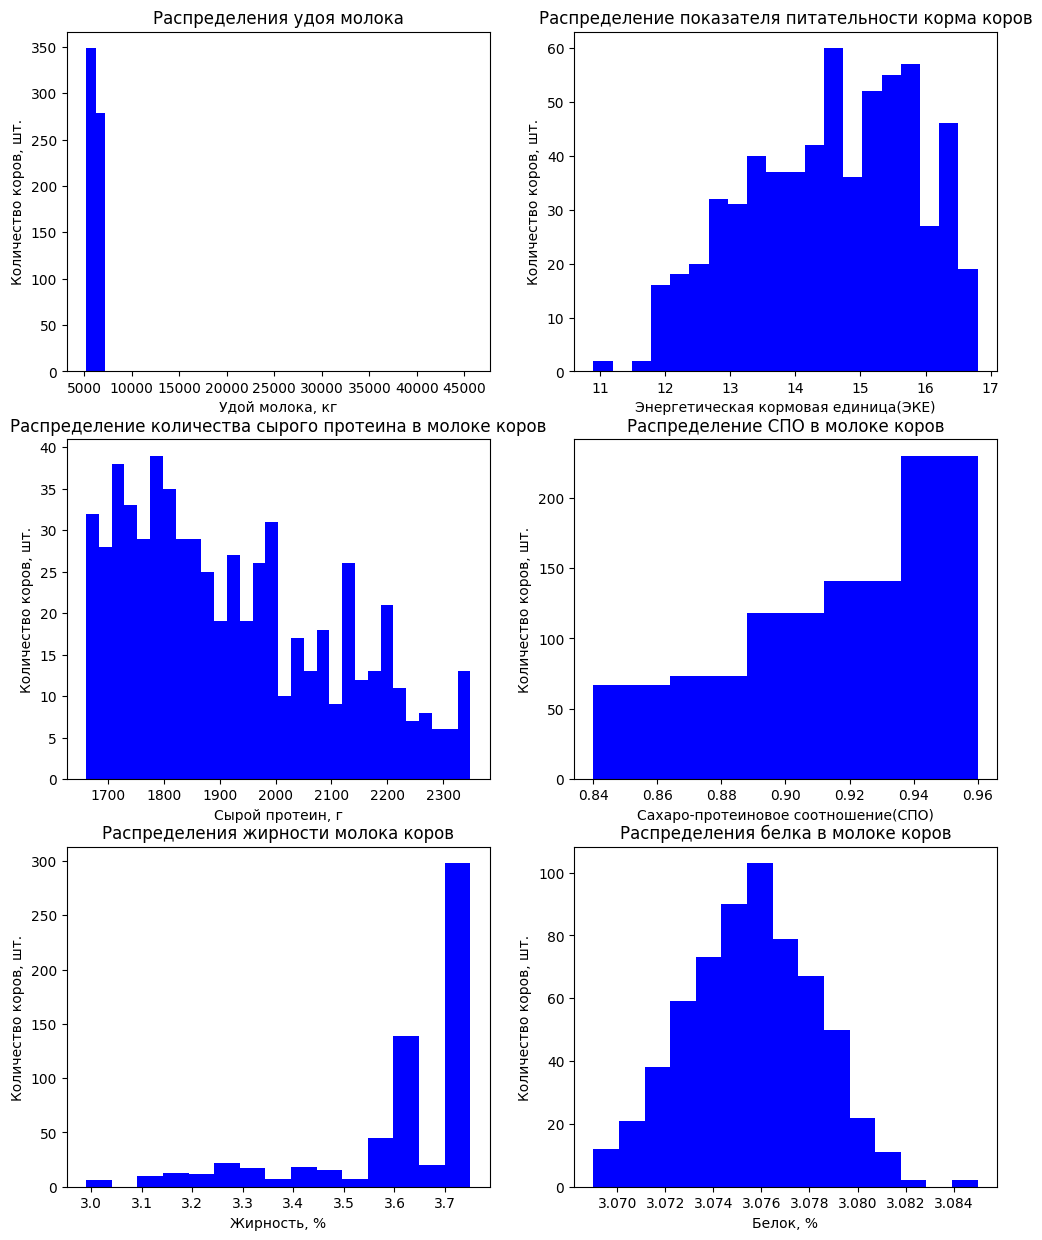

In [360]:
# Гистограммы для количественных признаков датасета ferma_main_df
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 15))
hist_build(ferma_main_df, 'milk_yield', 'blue', 'Удой молока, кг', 'Количество коров, шт.', 'Распределения удоя молока', 0, 0, 40, True)

hist_build(ferma_main_df, 'energetic_feed_unit', 'blue', 'Энергетическая кормовая единица(ЭКЕ)',
           'Количество коров, шт.', 'Распределение показателя питательности корма коров', 0, 1, 20, True)

hist_build(ferma_main_df, 'crude_protein', 'blue', 'Сырой протеин, г', 'Количество коров, шт.',
           'Распределение количества сырого протеина в молоке коров', 1, 0, 30, True)

hist_build(ferma_main_df, 'sugar_protein_ratio', 'blue', 'Cахаро-протеиновое соотношение(СПО)',
           'Количество коров, шт.', 'Распределение СПО в молоке коров', 1, 1, 5, True)

hist_build(ferma_main_df, 'fat_content', 'blue', 'Жирность, %', 'Количество коров, шт.', 'Распределения жирности молока коров', 2, 0, 15, True)

hist_build(ferma_main_df, 'protein', 'blue', 'Белок, %', 'Количество коров, шт.', 'Распределения белка в молоке коров', 2, 1, 15, True)

- В распределении удоя молока выбросом является случай, в котором корова даёт более 45000 кг, что невозможно. Вероятно, это ошибка в лишнем нуле, и на самом деле та корова даёт около 4500 кг молока.
- Остальные графики не показывают сильно выбивающихся данных, поэтому построим для этих столбцов ещё ящики с усами

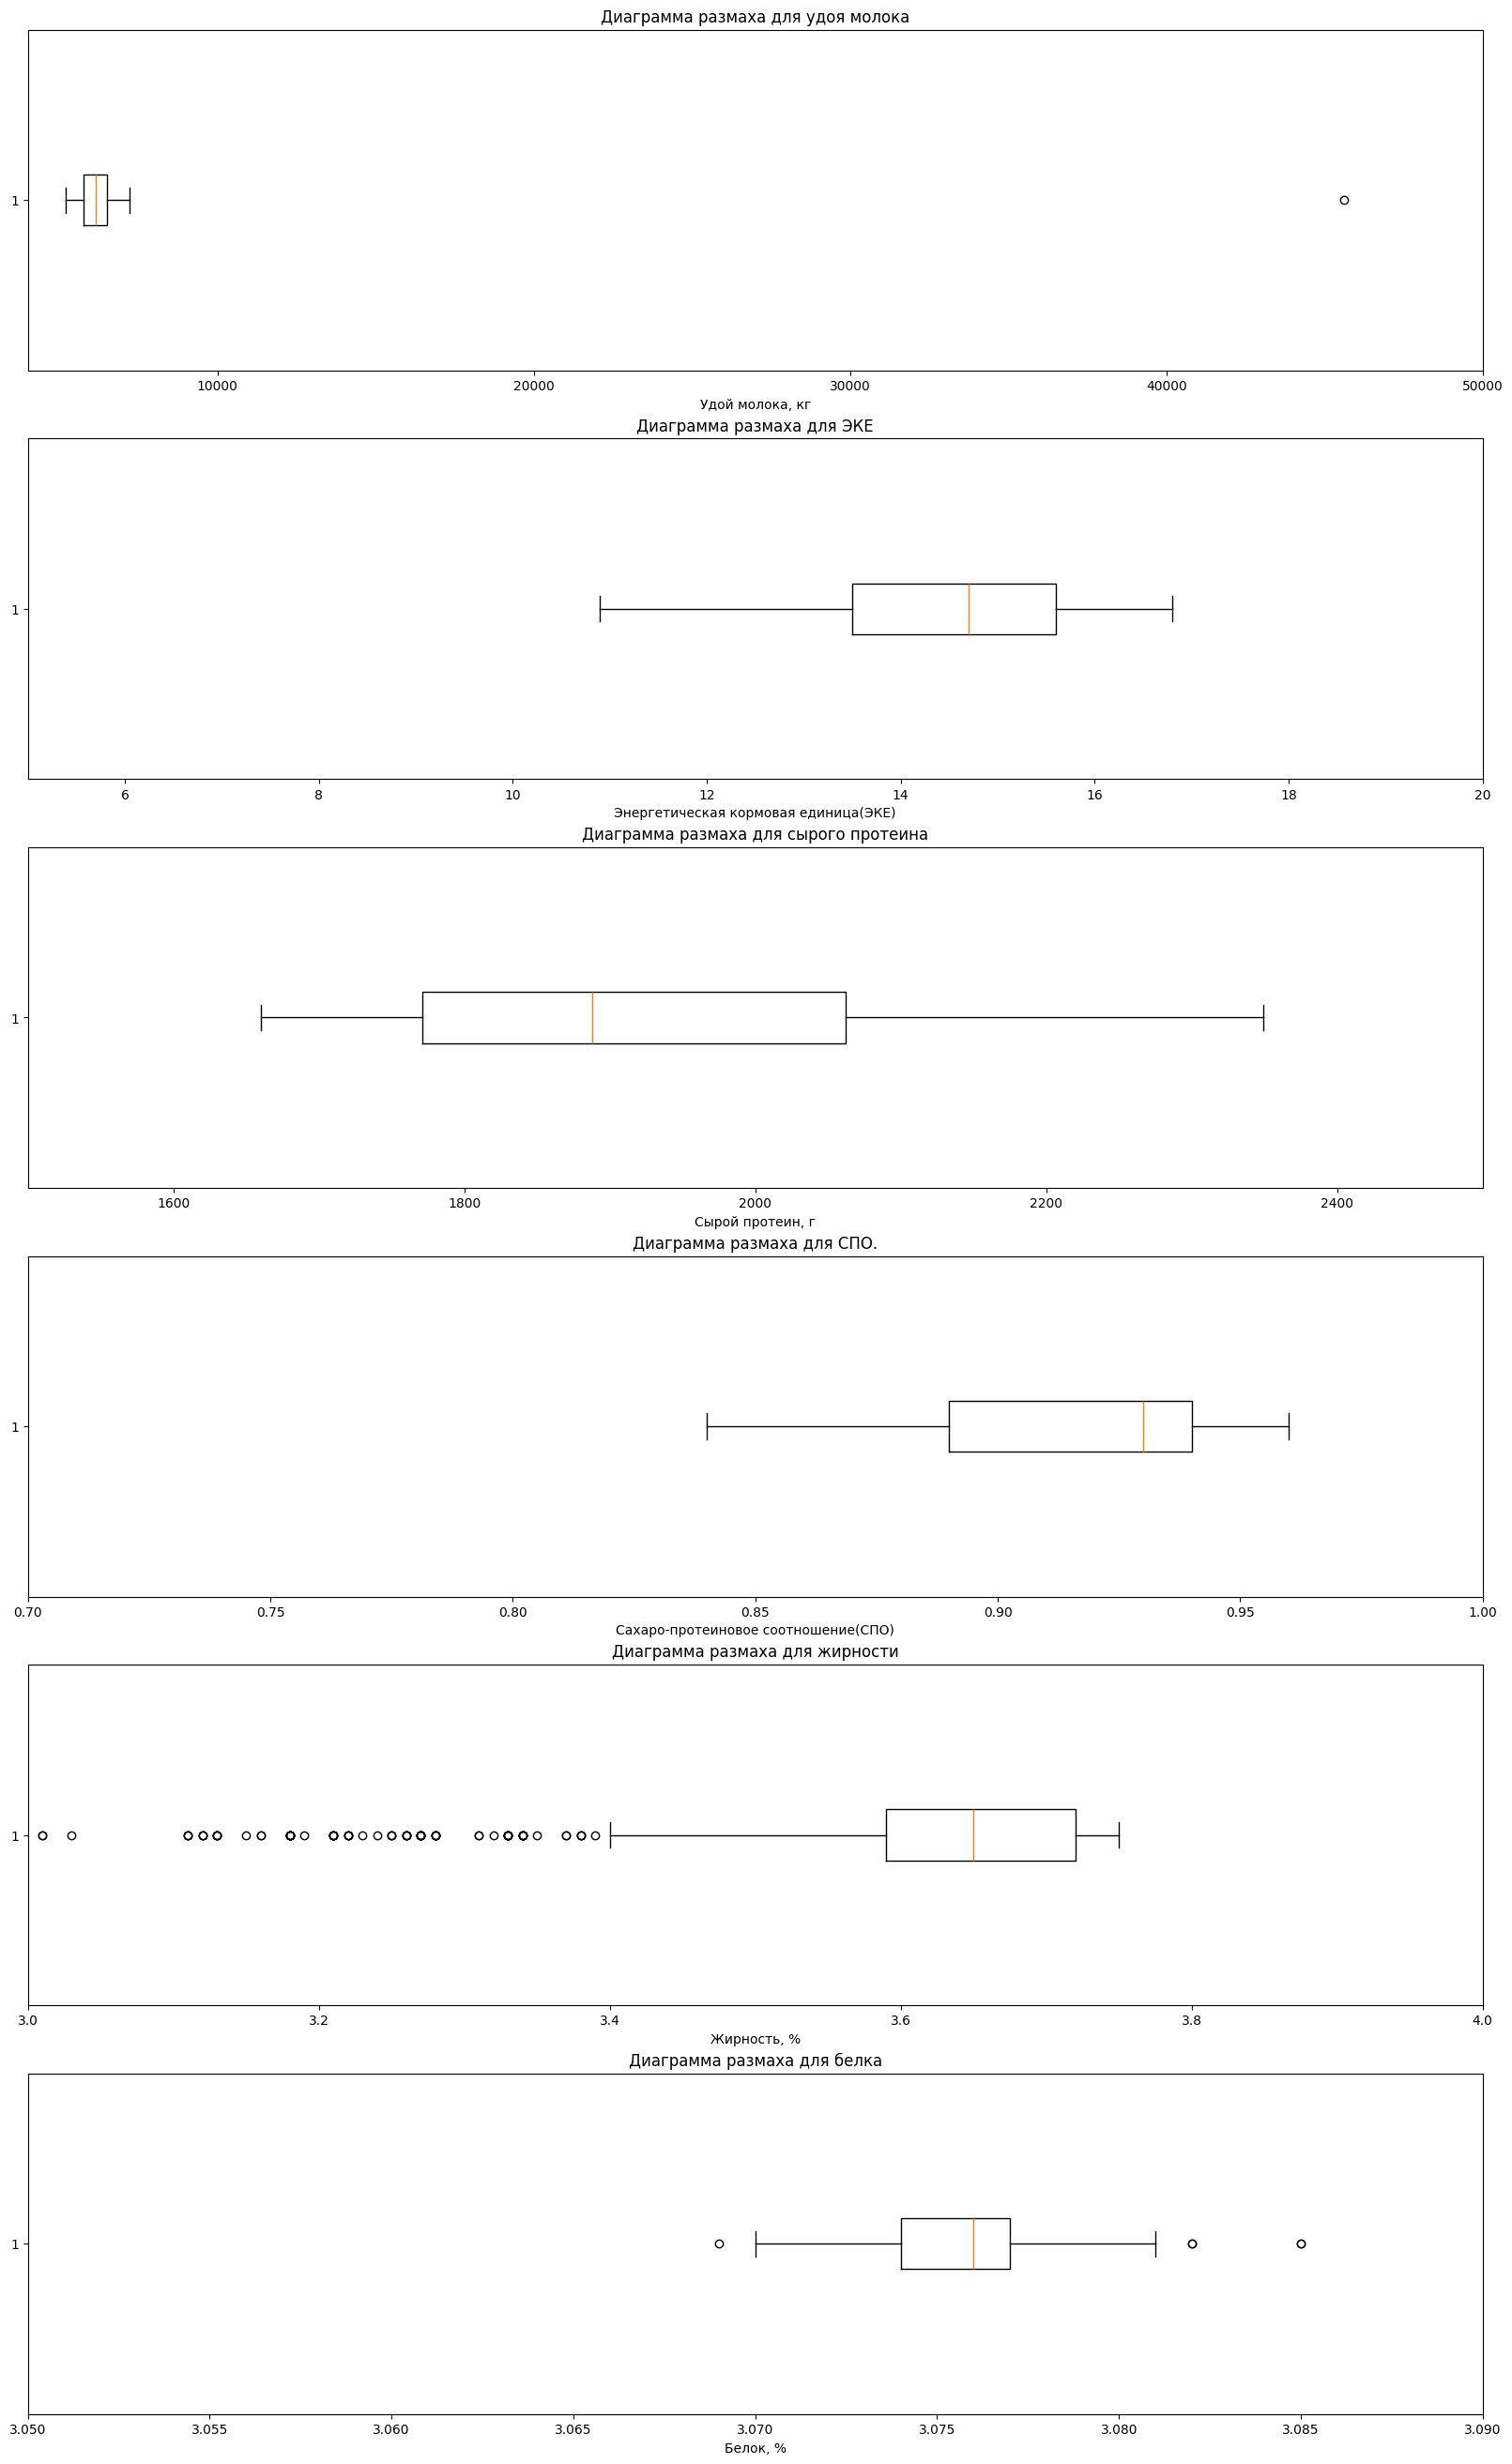

In [361]:
# Ящики с усами для датасета ferma_main_df
fig, axes = plt.subplots(nrows = 6, ncols = 1, figsize = (20, 33))
boxplot_build(ferma_main_df, 'milk_yield', 'Удой молока, кг', 'Диаграмма размаха для удоя молока', 0, 4000, 50000)

boxplot_build(ferma_main_df, 'energetic_feed_unit', 'Энергетическая кормовая единица(ЭКЕ)', 'Диаграмма размаха для ЭКЕ', 1, 5, 20)

boxplot_build(ferma_main_df, 'crude_protein', 'Сырой протеин, г', 'Диаграмма размаха для сырого протеина', 2, 1500, 2500)

boxplot_build(ferma_main_df, 'sugar_protein_ratio', 'Cахаро-протеиновое соотношение(СПО)', 'Диаграмма размаха для СПО.', 3, 0.7, 1)

boxplot_build(ferma_main_df, 'fat_content', 'Жирность, %', 'Диаграмма размаха для жирности', 4, 3, 4)

boxplot_build(ferma_main_df, 'protein', 'Белок, %', 'Диаграмма размаха для белка', 5, 3.05, 3.09)

- Рассматривая диаграммы размаха для каждого количественного признака из датасета `ferma_main_df`, можно заключить следующее:
    + У параметров `energetic_feed_unit`, `crude_protein`, а также `sugar_protein_ratio` отсутствуют выбросы, но при этом структура распределения данных несимметрична относительно медианы
    + Для параметров `fat_content`, `protein`, `milk_yield` характерны выбросы. Если для первых двух столбцов выбросы некритичны, то в случае с последним столбцом, где удой молока равен 45000 кг, нужно рассмотреть отдельно
    + Выброс необходимо удалить из датасета, так как даже если была совершена ошибка на 1 цифру, то в случае деления на 10 данного параметра, будет получен уже выброс слева от основной группы данных

In [362]:
(
ferma_main_df[['fat_content']].quantile([.001, .9988])
                                .style.format("{:,.2f}")
)

- Отбросим данные из столбца `fat_content`, которые находятся левее значения 3.1, так как на гистограмме и ящике с усами виден существенный разрыв даже от остальной группы выбросов

In [363]:
ferma_main_df = ferma_main_df.loc[ferma_main_df['fat_content'] >= 3.1]
ferma_main_df['fat_content'].describe()

count    623.000000
mean       3.609438
std        0.158768
min        3.110000
25%        3.590000
50%        3.650000
75%        3.720000
max        3.750000
Name: fat_content, dtype: float64

In [364]:
ferma_main_df['protein'].describe()

count    623.000000
mean       3.075660
std        0.002552
min        3.069000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.085000
Name: protein, dtype: float64

In [365]:
ferma_main_df = ferma_main_df.loc[(ferma_main_df['protein'] >= 3.07) & (ferma_main_df['protein'] <= 3.081)]
ferma_main_df['protein'].describe()

count    618.000000
mean       3.075620
std        0.002466
min        3.070000
25%        3.074000
50%        3.076000
75%        3.077000
max        3.081000
Name: protein, dtype: float64

- Выбросы в столбце `protein` удалили, так как они существенно выбивались из основной группы данных

In [366]:
ferma_main_df = ferma_main_df.loc[ferma_main_df['milk_yield'] < 40000]
ferma_main_df['milk_yield'].describe()

count     617.000000
mean     6132.564019
std       474.860878
min      5204.000000
25%      5754.000000
50%      6139.000000
75%      6502.000000
max      7222.000000
Name: milk_yield, dtype: float64

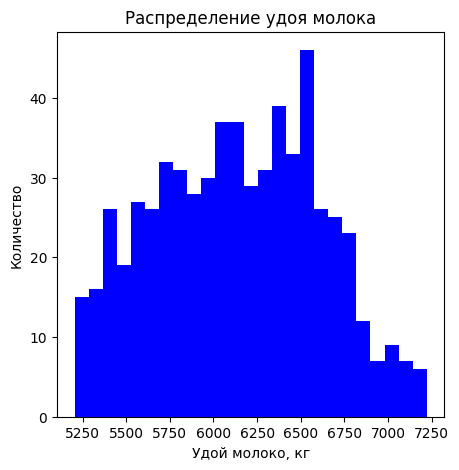

In [367]:
fig, ax = plt.subplots(figsize = (5, 5));
ax.set_title('Распределение удоя молока');
ax.hist(ferma_main_df['milk_yield'], bins = 25, color = 'blue');
ax.set_xlabel('Удой молоко, кг');
ax.set_ylabel('Количество');

- Столбец `milk_yield` был скорректирован

In [368]:
ferma_main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, 0 to 628
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   617 non-null    int64  
 1   milk_yield           617 non-null    int64  
 2   energetic_feed_unit  617 non-null    float64
 3   crude_protein        617 non-null    int64  
 4   sugar_protein_ratio  617 non-null    float64
 5   breed                617 non-null    object 
 6   type_of_grazing      617 non-null    object 
 7   bull_dad_breed       617 non-null    object 
 8   fat_content          617 non-null    float64
 9   protein              617 non-null    float64
 10  gustation_of_milk    617 non-null    object 
 11  age                  617 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 62.7+ KB


- Визуализация категориальных данных

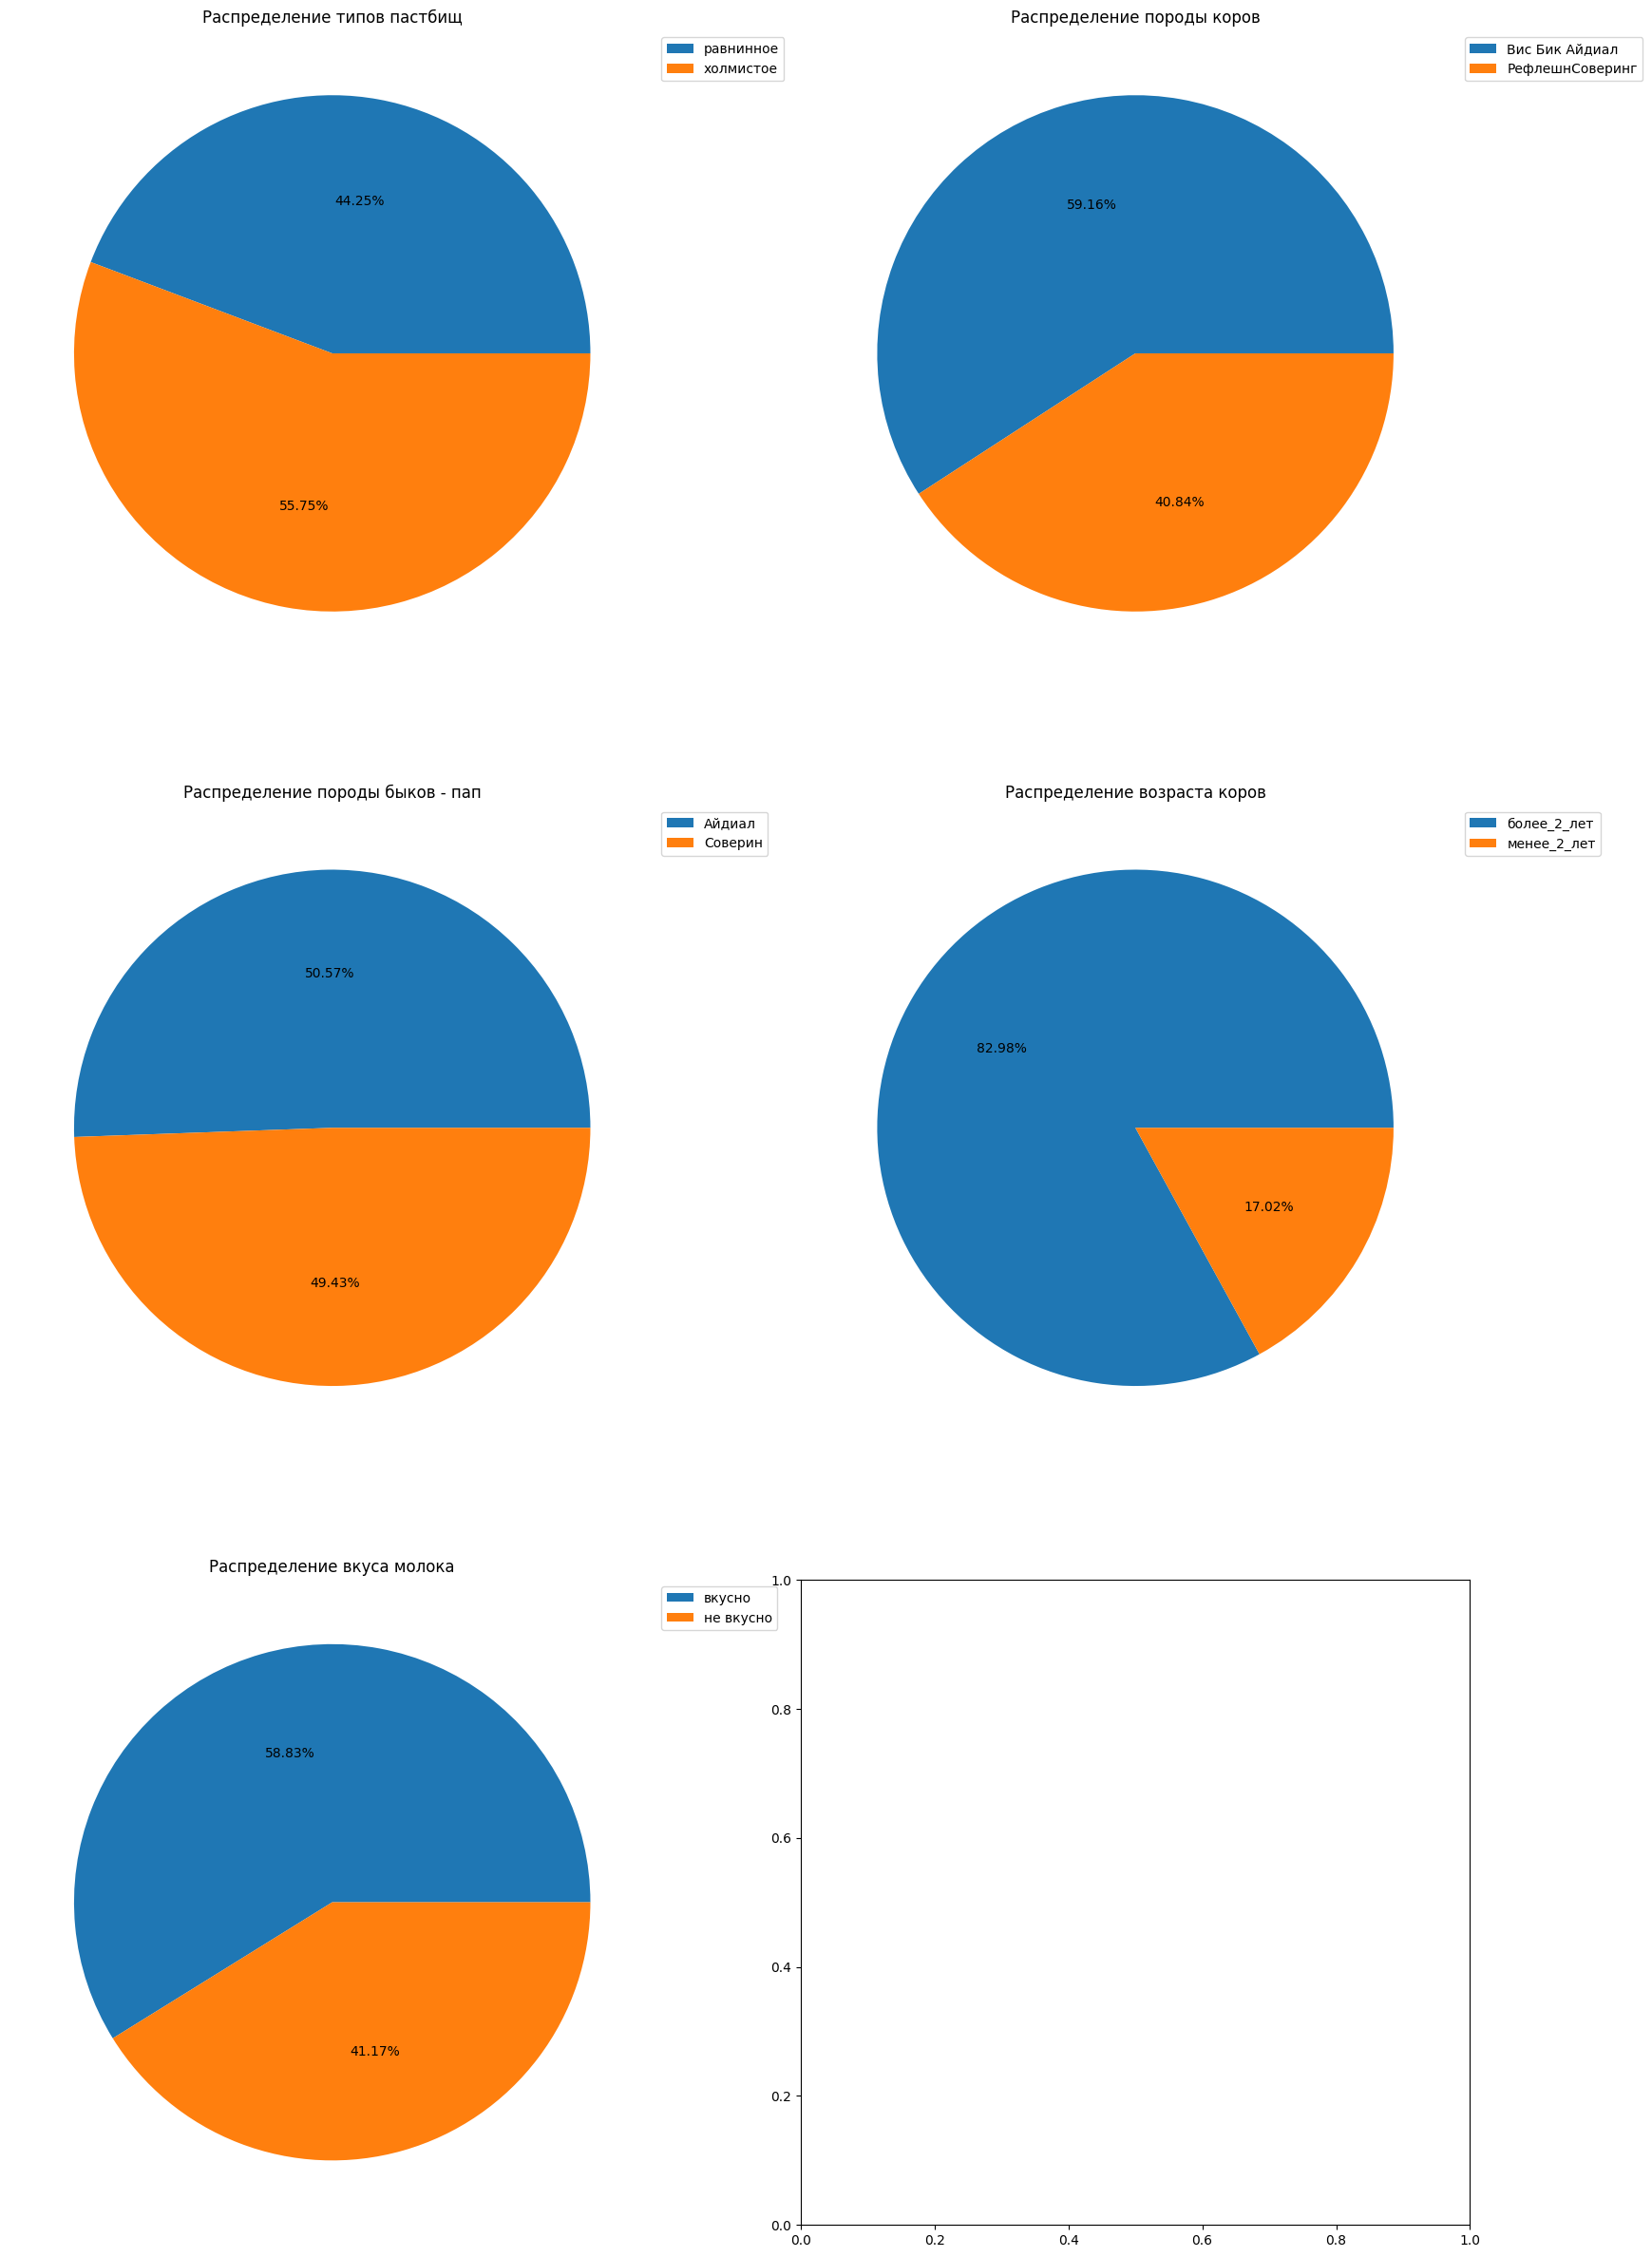

In [369]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30));
pie_build(ferma_main_df, 'type_of_grazing', 'id', 'Распределение типов пастбищ', 0, 0)
pie_build(ferma_main_df, 'breed', 'id', 'Распределение породы коров', 0, 1)
pie_build(ferma_main_df, 'bull_dad_breed', 'id', 'Распределение породы быков - пап', 1, 0)
pie_build(ferma_main_df, 'age', 'id', 'Распределение возраста коров', 1, 1)
pie_build(ferma_main_df, 'gustation_of_milk', 'id', 'Распределение вкуса молока', 2, 0)

- Заметим, что более 80% коров являются уже зрелыми(старше 2 лет)
- Только 59% от общего числа коров обладают вкусным молоком с точки зрения фермера

### Визуализация датасета `cow_buy_df`

- Визуализация количественных данных

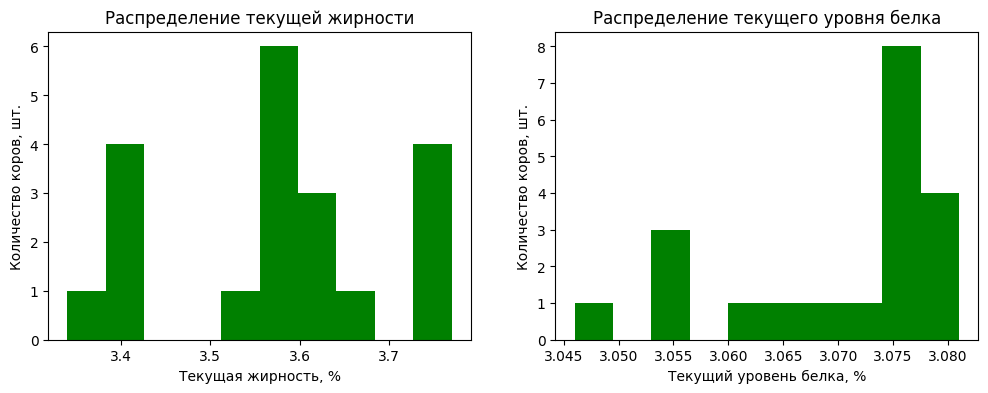

In [370]:
# Гистограммы для количественных признаков датасета cow_buy_df
fig, axes = plt.subplots(ncols = 2, figsize = (12, 4))
hist_build(cow_buy_df, 'current_fat_content', 'green', 'Текущая жирность, %', 'Количество коров, шт.',
           'Распределение текущей жирности', 0, 0, 10, False)

hist_build(cow_buy_df, 'current_level_protein', 'green', 'Текущий уровень белка, %',
           'Количество коров, шт.', 'Распределение текущего уровня белка', 0, 1, 10, False)

- Так как данных в этом датасете небольшое количество, то их не хватает для формирования определённого очертания распределения. По этой причине будем считать, что нормальное распределение в столбцах количественных признаков `current_fat_content` и `current_level_protein` отсутствует
- В случае, если бы данных было больше, то гистограммы приняли бы вид, как для количественных признаков `fat_content` и `protein`

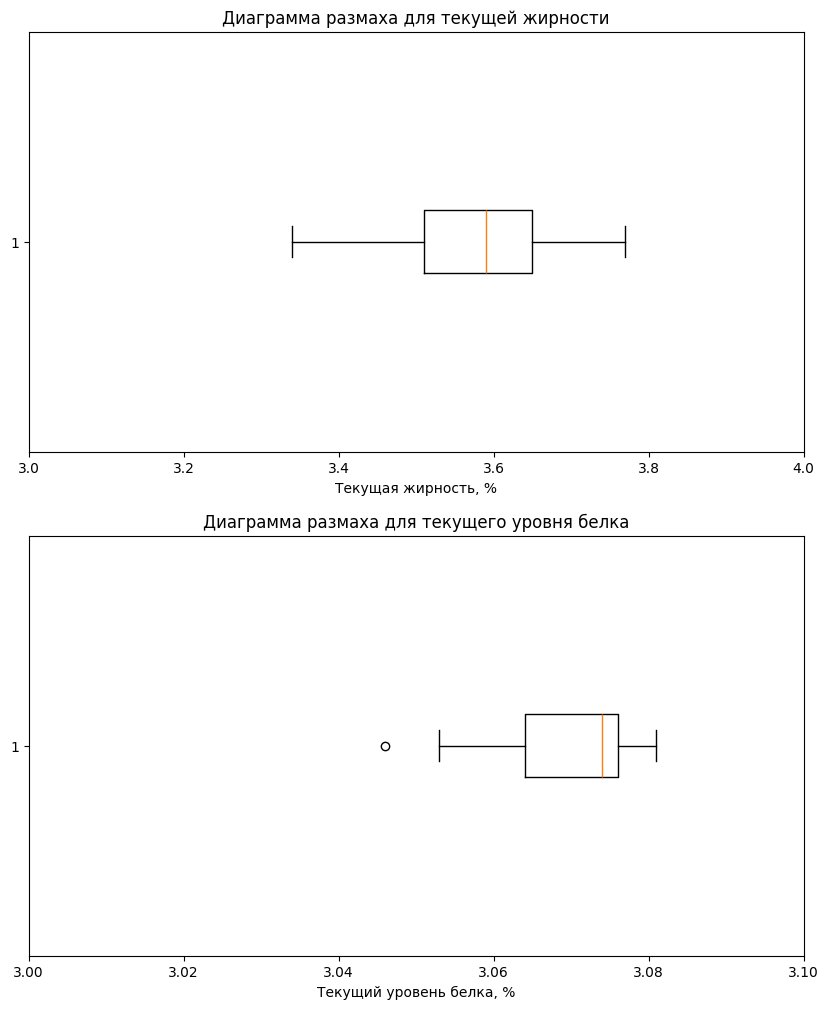

In [371]:
# Ящики с усами для датасета ferma_main_df
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 12))
boxplot_build(cow_buy_df, 'current_fat_content', 'Текущая жирность, %', 'Диаграмма размаха для текущей жирности', 0, 3, 4)

boxplot_build(cow_buy_df, 'current_level_protein', 'Текущий уровень белка, %', 'Диаграмма размаха для текущего уровня белка', 1, 3, 3.1)

- В датасете `cow_buy_df` мало информации (всего 20 строк). Тем не менее диаграммы ящиков с усами построены. Выбросов в данных не обнаружено

- Визуализация категориальных данных

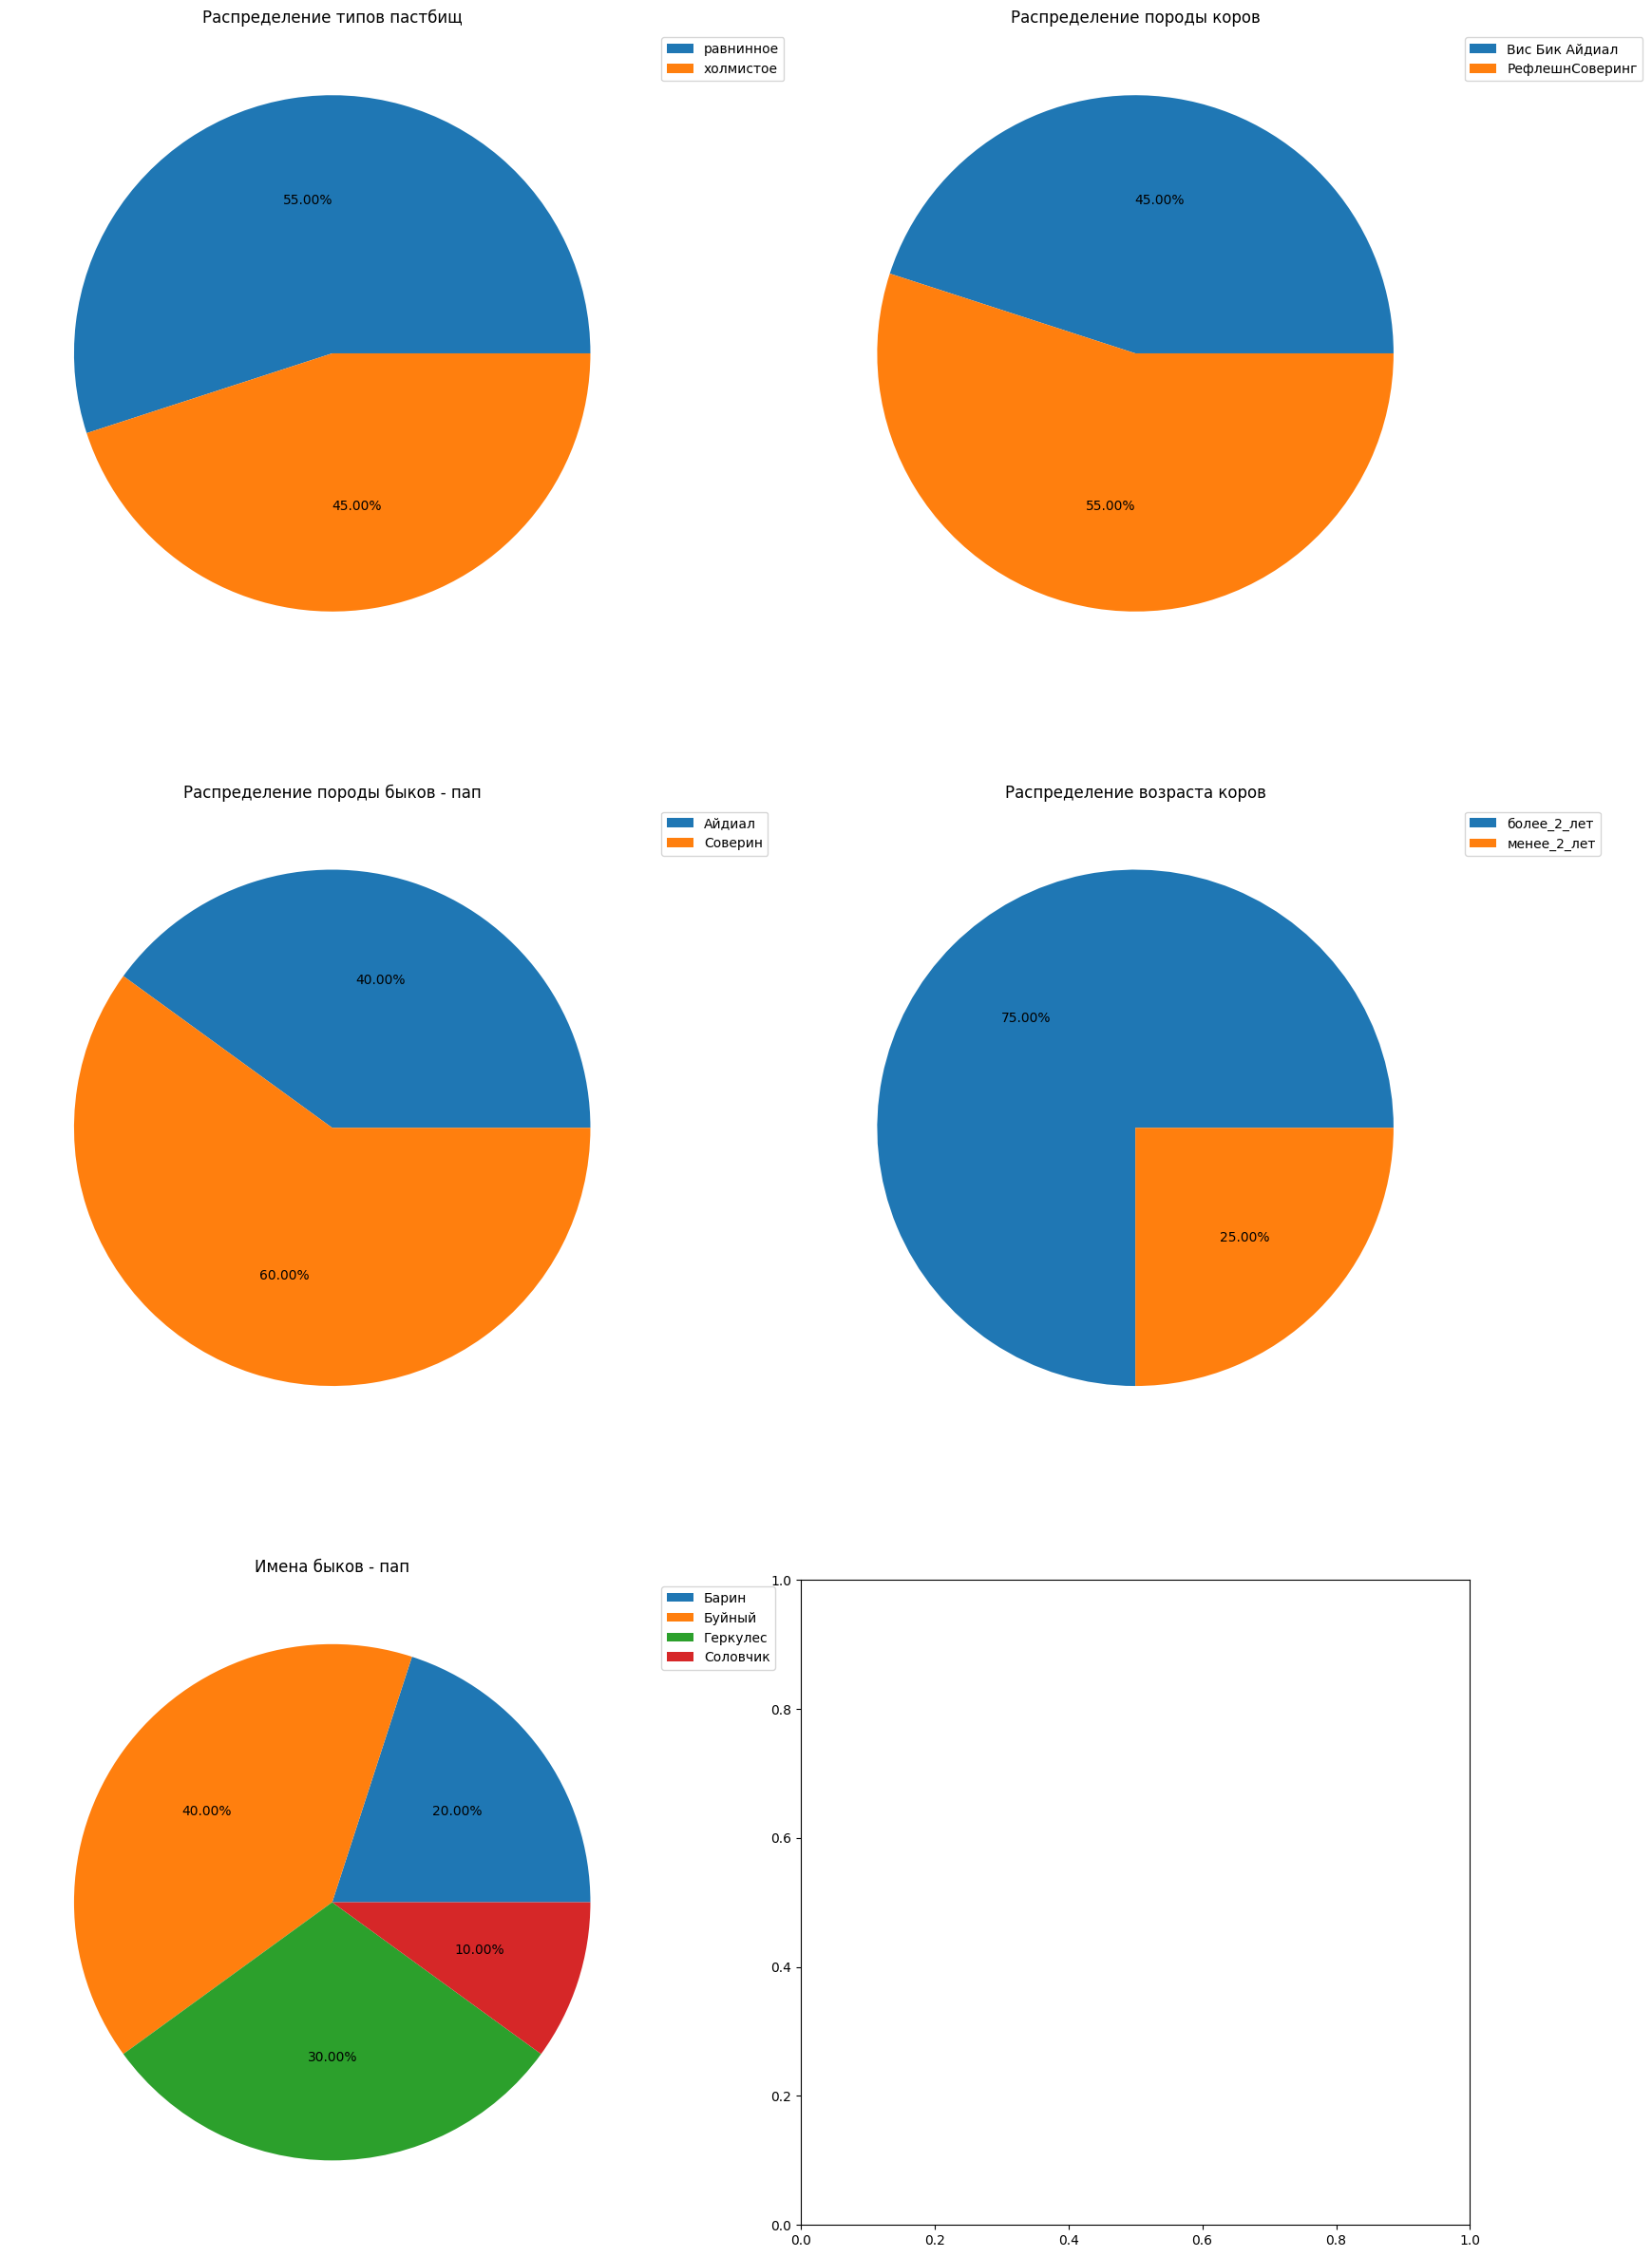

In [372]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30));
pie_build(cow_buy_df, 'type_of_grazing', 'current_fat_content', 'Распределение типов пастбищ', 0, 0)
pie_build(cow_buy_df, 'breed', 'current_fat_content', 'Распределение породы коров', 0, 1)
pie_build(cow_buy_df, 'bull_dad_breed', 'current_fat_content', 'Распределение породы быков - пап', 1, 0)
pie_build(cow_buy_df, 'age', 'current_fat_content', 'Распределение возраста коров', 1, 1)
pie_build(cow_buy_df, 'dad_name', 'current_fat_content', 'Имена быков - пап', 2, 0)

- В списке коров, которых потенциально рассматривают к покупке, больше молодых коров и их количество составляет 25 % , в то время как в основном списке их всего 17%
- Остальная информация визуализирована

In [373]:
cow_buy_df

breed type_of_grazing bull_dad_breed  dad_name  \
0    Вис Бик Айдиал       холмистое         Айдиал  Геркулес   
1    Вис Бик Айдиал       равнинное        Соверин    Буйный   
2   РефлешнСоверинг       равнинное        Соверин     Барин   
3   РефлешнСоверинг       холмистое         Айдиал    Буйный   
4   РефлешнСоверинг       равнинное         Айдиал    Буйный   
5   РефлешнСоверинг       равнинное        Соверин  Геркулес   
6    Вис Бик Айдиал       холмистое         Айдиал  Геркулес   
7    Вис Бик Айдиал       равнинное        Соверин    Буйный   
8   РефлешнСоверинг       равнинное        Соверин     Барин   
9   РефлешнСоверинг       холмистое         Айдиал    Буйный   
10   Вис Бик Айдиал       холмистое        Соверин  Соловчик   
11  РефлешнСоверинг       равнинное        Соверин  Геркулес   
12   Вис Бик Айдиал       холмистое         Айдиал  Геркулес   
13   Вис Бик Айдиал       холмистое        Соверин     Барин   
14  РефлешнСоверинг       равнинное        Соверин     Барин   
15  РефлешнСоверинг       холмистое         Айдиал    Буйный   
16   Вис Бик Айдиал       холмистое        Соверин  Соловчик   
17  РефлешнСоверинг       равнинное        Соверин  Геркулес   
18   Вис Бик Айдиал       равнинное        Соверин    Буйный   
19  РефлешнСоверинг       равнинное         Айдиал    Буйный   

    current_fat_content  current_level_protein          age  
0                  3.58                  3.076  более_2_лет  
1                  3.54                  3.081  менее_2_лет  
2                  3.59                  3.074  более_2_лет  
3                  3.40                  3.061  более_2_лет  
4                  3.64                  3.074  более_2_лет  
5                  3.63                  3.053  менее_2_лет  
6                  3.58                  3.076  более_2_лет  
7                  3.57                  3.079  более_2_лет  
8                  3.59                  3.074  более_2_лет  
9                  3.40                  3.079  менее_2_лет  
10                 3.73                  3.055  более_2_лет  
11                 3.73                  3.073  более_2_лет  
12                 3.68                  3.046  более_2_лет  
13                 3.42                  3.075  менее_2_лет  
14                 3.59                  3.074  более_2_лет  
15                 3.40                  3.065  более_2_лет  
16                 3.73                  3.079  более_2_лет  
17                 3.77                  3.053  менее_2_лет  
18                 3.34                  3.069  более_2_лет  
19                 3.64                  3.074  более_2_лет

### Визуализация датасета `ferma_dad_df`

- Визуализация категориальных данных

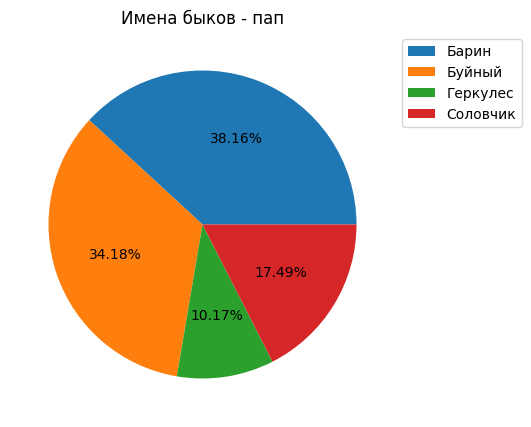

In [374]:
fig, ax = plt.subplots(figsize = (5, 5))
df_column = ferma_dad_df.pivot_table(index = 'dad_name', values = 'id', aggfunc = ['count'])
df_column.columns = ['quantity']
df_column['quantity'] = df_column['quantity'] / ferma_dad_df['dad_name'].count()
ax.set_title('Имена быков - пап');
ax.pie(df_column['quantity'], autopct='%1.2f%%');
ax.legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left', labels = df_column.index);

### Вывод:
- Визуализация количественных и категориальных данных произведена
- Критического уровня выбросов и искажений данных не обнаружено, тем не менее необходимая корректировка была выполнена в столбцах `fat_content`, `protein`, `milk_yield`
- Комментарии и выявление особенностей в данных приведены после визуализаций к соответствующим датасетам

### Комментарий по поводу распределения данных:
- Нормальное распределение данных присутствует в стобцах `protein` и `energetic_feed_unit`, и гистограмма целевого признака `milk_yield` имеет колоколообразный вид после удаления выбросов (датасет `ferma_main_df`)
- Остальные количественные данные в датасетах не обладают нормальным распределением по разным причинам(малое количество данных, высокая дискретность распределения признака, прочие факторы, зависящие уже от самого процесса в бизнесе)

# Шаг 4. Корреляционный анализ признаков

### 4.1. Матрица корреляции

- Построим тепловую карту между количественными признаками датасета `ferma_main_df`

In [375]:
# Запишем массив названий столбцов датасета ferma_main_df с количественными признаками
ferma_main_df_quant_chrctrs = ['milk_yield', 'energetic_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein']
display(ferma_main_df[ferma_main_df_quant_chrctrs].corr(method = "spearman"))

milk_yield  energetic_feed_unit  crude_protein  \
milk_yield             1.000000             0.762339       0.435553   
energetic_feed_unit    0.762339             1.000000       0.382943   
crude_protein          0.435553             0.382943       1.000000   
sugar_protein_ratio    0.783469             0.739847       0.485479   
fat_content            0.682574             0.682415       0.390673   
protein               -0.002220            -0.008826       0.225871   

                     sugar_protein_ratio  fat_content   protein  
milk_yield                      0.783469     0.682574 -0.002220  
energetic_feed_unit             0.739847     0.682415 -0.008826  
crude_protein                   0.485479     0.390673  0.225871  
sugar_protein_ratio             1.000000     0.693976  0.119844  
fat_content                     0.693976     1.000000  0.058308  
protein                         0.119844     0.058308  1.000000

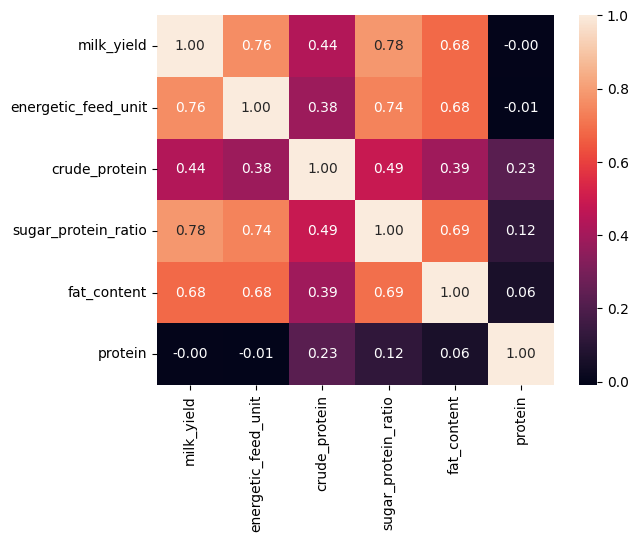

In [376]:
# Тепловая карта
sns.heatmap(ferma_main_df[ferma_main_df_quant_chrctrs].corr(method = "spearman"), annot = True, fmt = ".2f");

- Анализируя тепловую карту можно заключить следующее:
    + Между признаками `milk_yield`, `sugar_protein_ratio` и `energetic_feed_unit` наблюдаются высокие значения коэффициента корреляции : 0.78 и 0.76 соответственно
    + У признаков `sugar_protein_ratio` и `energetic_feed_unit` коэффициент корреляции равен 0.74, что также является высоким уровнем корреляции
    + Признак `fat_content`c признаками `milk_yield`, `energetic_feed_unit`, `sugar_protein_ratio` обладает заметной корреляцией (коэффициенты корреляции : 0.68, 0.68 и 0.69 соответственно)
    + Между остальными признаками присутствует либо умеренная корреляция (коэффициент корреляции колеблется около 0.4), либо её нет вовсе, как у признака `protein` и другими количественными признаками в датасете
    + В датасете отсутствует мультиколлинеарность, так как значения корреляций признаков не превышают 0.78. В то время как мультиколлинеарностью между признаками считается корреляция более 0.9

### 4.2. Диаграмма рассеяния

- Напишем функцию, которая будет строить диаграммы рассеяния между целевым признаком и количественными признаками с учётом категориальных признаков

In [377]:
# Функция для построения диаграммы рассеяния c настройками параметров
# Описание параметров функции:
# quant_attribute - количественный признак
# target - целевой признак
# cat_attribute - категориальный признак
# dict_of_change - словарь для перевода названий признаков с русского на английский
def scatterplot_build(df, quant_attribute, target, cat_attribute, dict_of_change):
    plt.figure(figsize = (5, 5));
    sns.scatterplot(data = df, x = quant_attribute, y = target, style = cat_attribute, hue = cat_attribute)
    plt.xlabel(dict_of_change.get(quant_attribute));
    plt.ylabel(dict_of_change.get(target));
    plt.legend(title = dict_of_change.get(cat_attribute));

In [378]:
# Функция для построения матрицы диаграмм рассеяния
def scatterplot_matrix_build(df, series_of_quant_attribute, target, cat_attribute, dict_of_change):
    for quant_attribute in series_of_quant_attribute:
         scatterplot_build(df, quant_attribute, target, cat_attribute, dict_of_change)

In [379]:
# Словарь для перевода названий столбцов с английского на русский для подписи осей
dict_of_change = {
                    'milk_yield' : 'Удой молока, кг',
                    'energetic_feed_unit' : 'Энергетическая кормовая единица(ЭКЕ)',
                    'crude_protein' : 'Сырой протеин, г',
                    'sugar_protein_ratio' : 'СПО (Сахаро-протеиновое соотношение)',
                    'breed': 'Порода',
                    'type_of_grazing' : 'Тип пастбища',
                    'bull_dad_breed' : 'Порода папы - быка',
                    'fat_content' : 'Жирность, %',
                    'protein' : 'Белок, %',
                    'gustation_of_milk' : 'Вкус молока',
                    'age' : 'Возраст',
                    'dad_name' : 'Имя папы - быка',
                    'efi_binary' : 'ЭКЕ - бинарное',
                    'spr_squared' : 'СПО в квадрате'
                 }
# Входные количественные признаки датасета ferma_main_df
ferma_main_df_quant_attributes = ['energetic_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein']
ferma_main_df_cat_attributes = ['breed', 'type_of_grazing', 'bull_dad_breed', 'age', 'gustation_of_milk']

- Построение диаграмм рассеивания между целевым признаком `milk_yield` и количественными признаками с учётом категориального признака `breed` (порода)

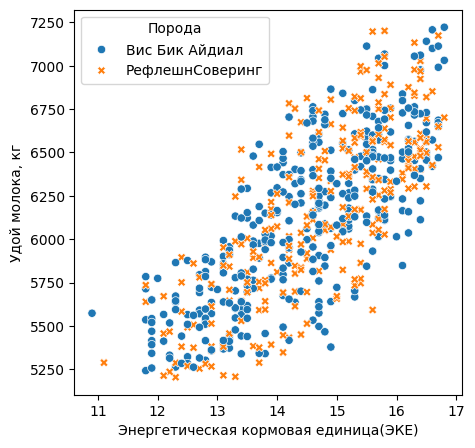

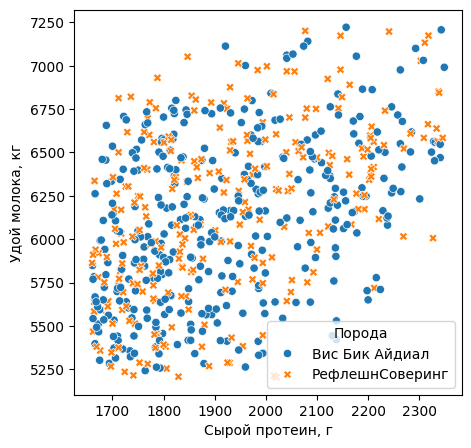

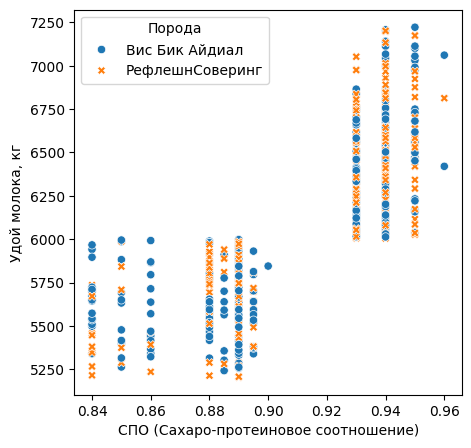

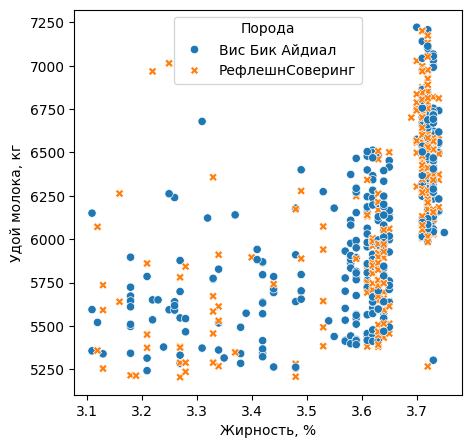

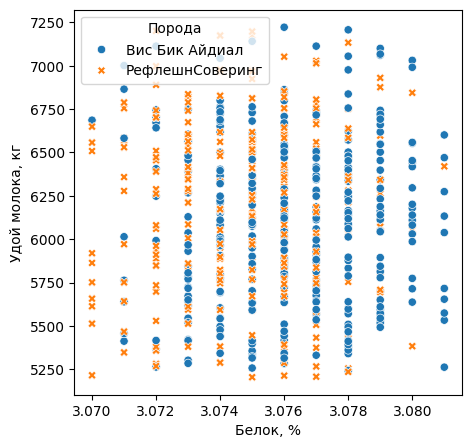

In [380]:
scatterplot_matrix_build(ferma_main_df, ferma_main_df_quant_attributes, 'milk_yield', 'breed', dict_of_change);

- Построение диаграмм рассеивания между целевым признаком `milk_yield` и количественными признаками с учётом категориального признака `type_of_grazing` (тип пастбища)

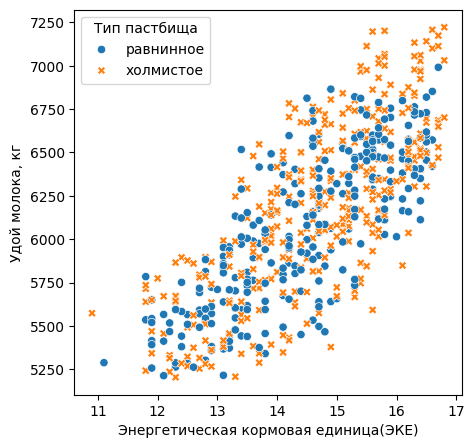

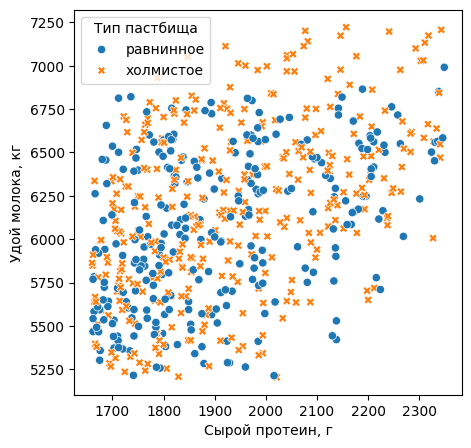

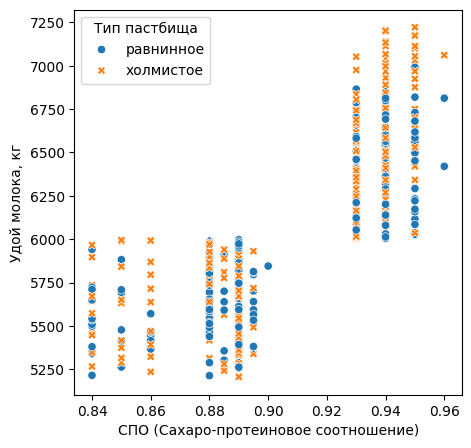

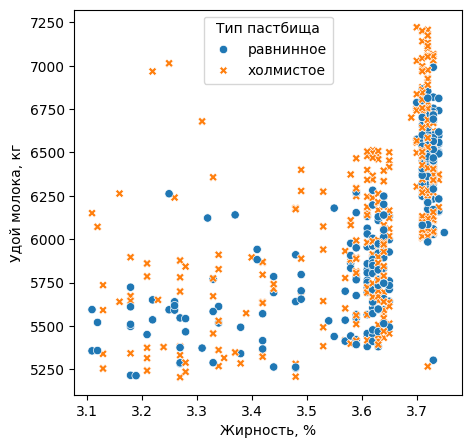

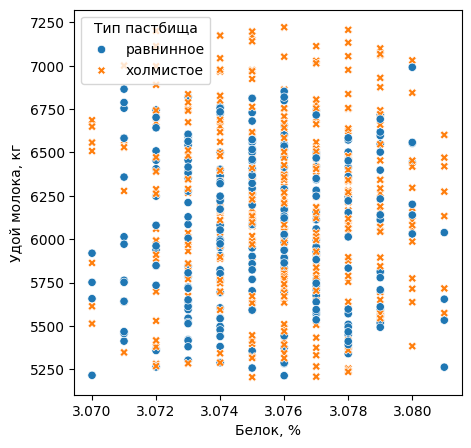

In [381]:
scatterplot_matrix_build(ferma_main_df, ferma_main_df_quant_attributes, 'milk_yield', 'type_of_grazing', dict_of_change);

- Построение диаграмм рассеивания между целевым признаком `milk_yield` и количественными признаками с учётом категориального признака `bull_dad_breed` (порода папы - быка)

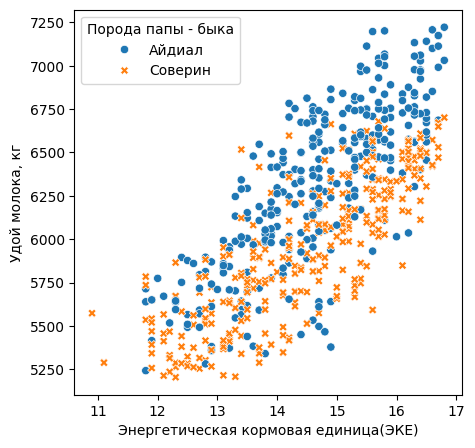

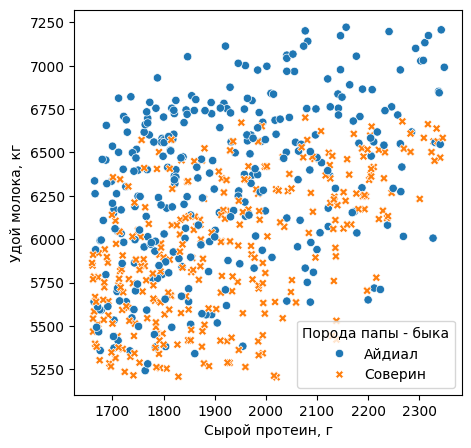

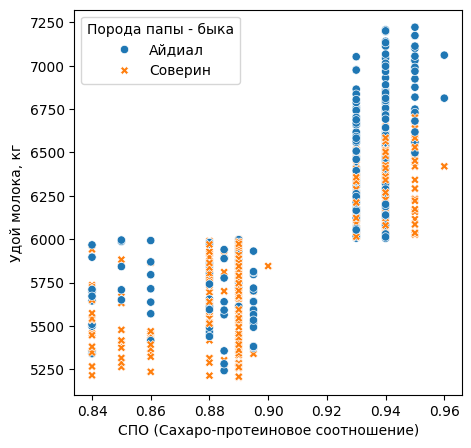

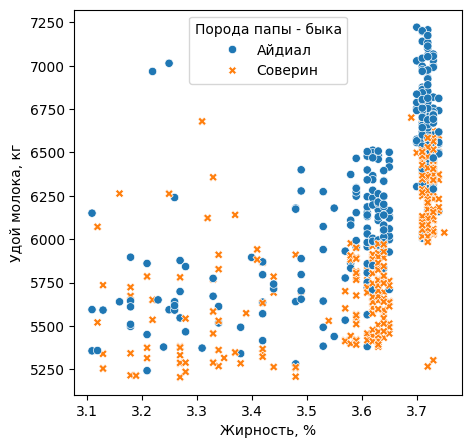

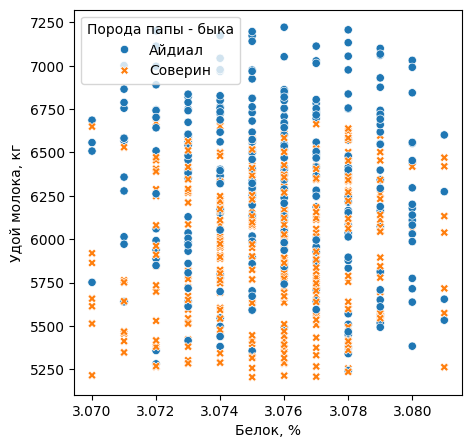

In [382]:
scatterplot_matrix_build(ferma_main_df, ferma_main_df_quant_attributes, 'milk_yield', 'bull_dad_breed', dict_of_change);

- Построение диаграмм рассеивания между целевым признаком `milk_yield` и количественными признаками с учётом категориального признака `age` (возраст)

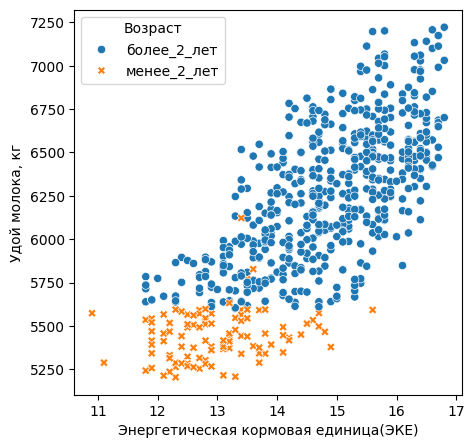

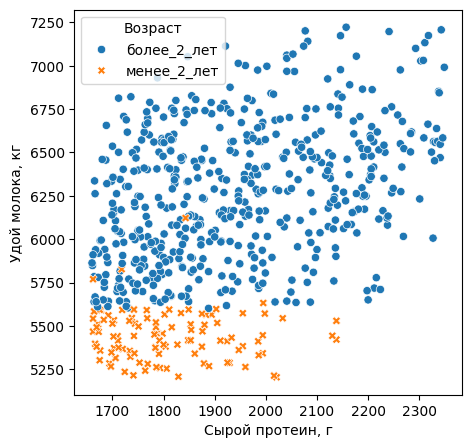

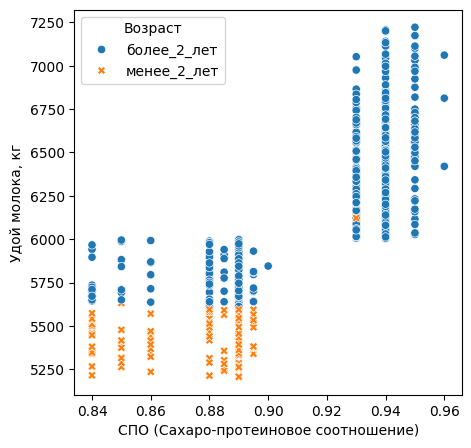

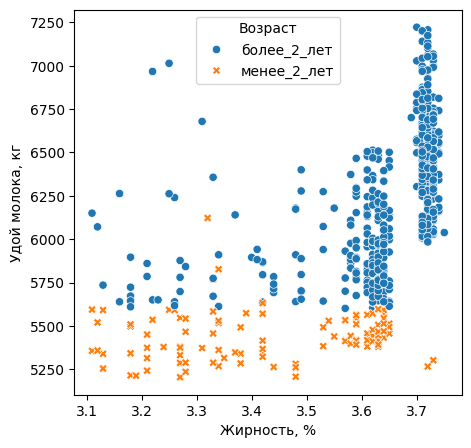

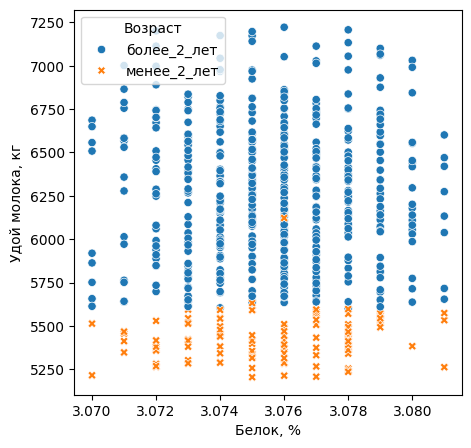

In [383]:
scatterplot_matrix_build(ferma_main_df, ferma_main_df_quant_attributes, 'milk_yield', 'age', dict_of_change);

- Построение диаграмм рассеивания между целевым признаком `milk_yield` и количественными признаками с учётом категориального признака `gustation_of_milk` (возраст)

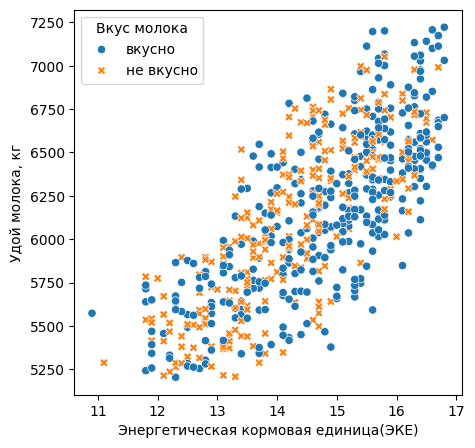

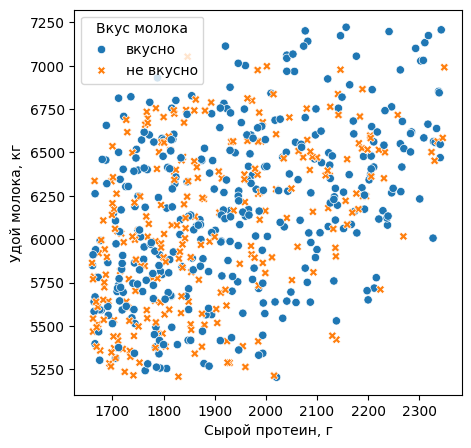

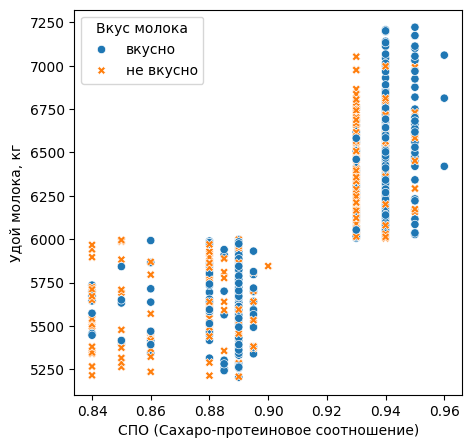

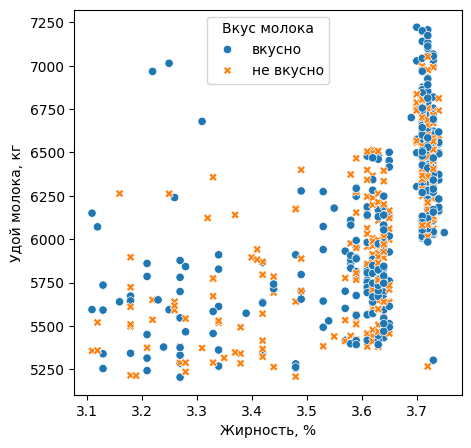

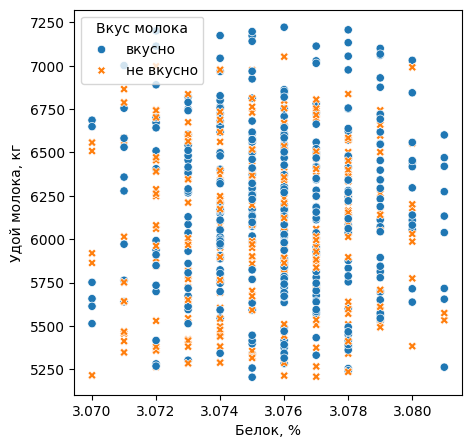

In [384]:
scatterplot_matrix_build(ferma_main_df, ferma_main_df_quant_attributes, 'milk_yield', 'gustation_of_milk', dict_of_change);

### 4.3. Выводы о взаимосвязи признаков

### 4.3.1 Взаимосвязь признаков

- Показатели по удою молока у коров с возрастом(`age`) менее 2 лет менее 5600 кг в год независимо от остальных количественных параметров. В то время как коровы возрастом более 2 - ух лет обладают лучшими параметрами по удою молока
- Из диаграммы, где учитывается признак `bull_dad_breed`, видно, что коровы, у которых папа - бык породы "Айдиал", дают больше молока, а также по всем параметрам обходят тех коров, у которых порода папы - быка "Соверинг"
- Следует обратить внимание, что у признаков `energetic_feed_unit`(энергетическая кормовая единица) и `sugar_protein_ratio`(сахаро - протеиновое соотношение корма коров) наблюдается взаимосвязь
- По диаграмме между удоем молока и сахаро - протеиновым соотношением(`sugar_protein_ratio`), где категориальным признаком выступает вкус молока(`gustation_of_milk`) видно, что если сахаро - протеиновое соотношение более 0.92, то молоко является вкусным
- Обратим внимание на тот факт, что коровы, сахаро - протеиновое соотношение(`sugar_protein_ratio`) корма которых превышает 0.92, гарантировано дают более 6000 кг молока в год, при этом те коровы, у которых это признак менее 0.9, наоборот, дают менее 6000 кг молока в год
- Коровы, которые пасутся на холмистой местности дают больше молока нежели те, что на равнинной местности
- В датасете отсутствует мультиколлинеарность, так как значения корреляции для всех признаков не превышают 0.78, в то время как мультиколлинеарностью считается корреляция между признаками более 0.9. Поэтому при выборе входных признаков не требуется применять дополнительные методы по устранению мультиколлинеарности

### 4.3.2 Замечания по поводу данных и диаграмм

- Заметим, что признаки `sugar_protein_ration` и `protein` обладают дискретным распределением, несмотря на то что у них вещественный тип данных

# Шаг 5. Задача регрессии

### 5.1 Обучение первой модели линейной регрессии

- Для обучения первой модели в качестве входных признаков используем :
    + `sugar_protein_ratio` - хоть и признак обладает дискретными значениями, тем не менее линейность между данным входным и целевым признаками высокая корреляция (количественный признак)
    + `energetic_feed_unit` - аналагично предыдущему у признака высокая корреляция с целевым признаком (количественный признак)
    + `fat_content` - несмотря на то что визуально характеристика обладает высоким разбросом по целевому признаку, в ней присутствует линейное возрастание как минимальных, так и максимальных значений целевых значений при повышении значений данного признака, а также значение корреляция между целевым и входным признаками заметна (количественный признак)
    + `age` - используем данный категориальный признак, так как на диаграммах рассеяния видно, что коровы, которые старше 2 лет, дают значительно больше молока, чем молодые коровы (менее 2 лет) (категориальный признак)
    + `gustation_of_milk` - на диаграммах рассеяния, в которых разграничены значения по группам с этим категориальным признаком, видно пусть и незначительное, но `преимущество` в показателях по удою молока с параметром `вкусно` (категориальный признак)
    + `bull_dad_breed` - по диаграммам рассеяниях заметно, что коровы, у которых порода папы - быка `Айдиал` дают `больше` молока по сравнению с коровами, у которых порода папы - быка `Соверинг` (категориальный признак)
    + `type_of_grazing` - коровы, которые пасутся на `холмистой` местности дают `больше молока` (категориальный признак)

In [385]:
# Обучение модели
RANDOM_STATE = 42
# Входные количественные и категориальные признаки соответственно
num_col_names = ['sugar_protein_ratio', 'energetic_feed_unit']
cat_col_names = ['age', 'bull_dad_breed', 'type_of_grazing', 'breed']

X = ferma_main_df[num_col_names + cat_col_names]
y = ferma_main_df['milk_yield']

# Разбивка датасета на тренировочную и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

In [386]:
# Подготовка признаков - масштабирование и кодирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])

encoder = OneHotEncoder(drop = 'first', sparse_output = False)
X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
X_test_ohe = encoder.transform(X_test[cat_col_names])

X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

X_train = pd.concat([X_train_scaled, X_train_ohe], axis = 1)
X_test = pd.concat([X_test_scaled, X_test_ohe], axis = 1)

In [387]:
# Проверим правильность масштабирования данных

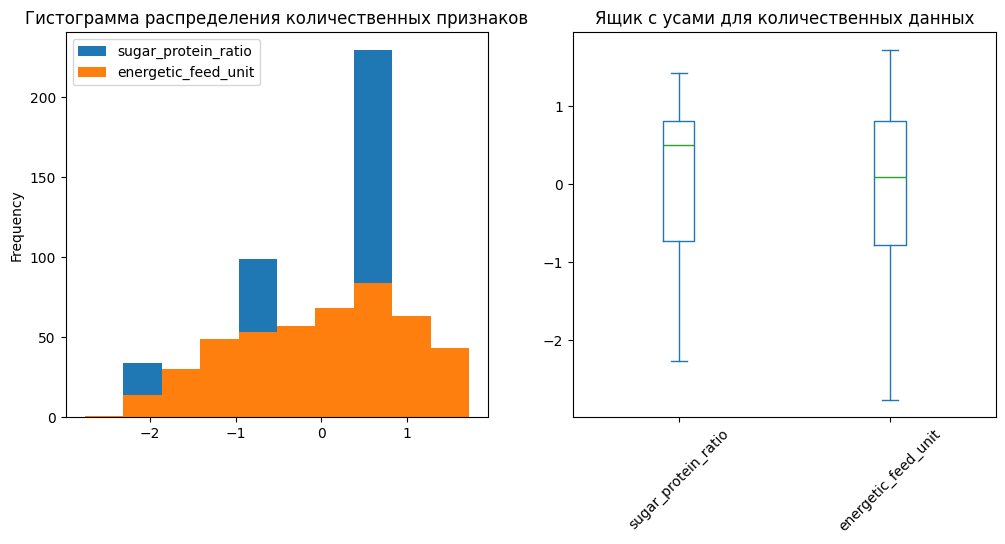

In [388]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
axes[0].set_title('Гистограмма распределения количественных признаков');
X_train[num_col_names].plot(kind = 'hist', bins = 10, ax = axes[0]);
axes[1].set_title('Ящик с усами для количественных данных');
X_train[num_col_names].plot(kind = 'box', ax = axes[1], rot = 45);

- Большая часть данных для каждого из количественных признаков распределена в промежутке от -2 до 2. В случае с признаком `fat_content` есть некоторое количество выбросов, которые выделяются

In [389]:
# Обучение модели и получение предсказаний на тестовых данных
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_test)

- Расчёт ошибки $R^2$

In [390]:
r2 = r2_score(y_test, predictions)
print(f"Коэффициент детерминации для модели равен {round(r2, 3)}")

Коэффициент детерминации для модели равен 0.808


- $R^2 = 0.808$

- Анализ остатков

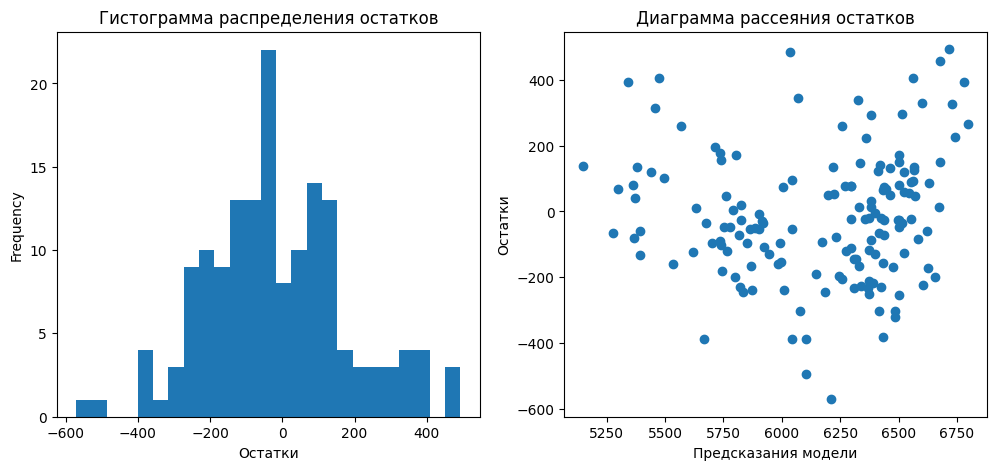

In [391]:
residuals = y_test - predictions
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5));
axes[0].set_title('Гистограмма распределения остатков');
residuals.plot(kind = 'hist', bins = 25, ax = axes[0]);
axes[0].set_xlabel('Остатки');

axes[1].set_title('Диаграмма рассеяния остатков');
axes[1].scatter(x = predictions, y = residuals);
axes[1].set_xlabel('Предсказания модели');
axes[1].set_ylabel('Остатки');

predictions_and_y_test_1 = [y_test, predictions]

### Выводы:
- $R^2 = 0.808$ - достаточно хороший показатель
- Но анализ остатков говорит о том, что модель работает неустойчиво, так как дисперсия для модели непостоянна (на диаграмме виден "рупор"), а на гистограмме распределения остатков диаграмма выглядит как мультимодальное распределение, смещённое влево (модель склонна завышать значения), а также слева у модели присутствуют выбросы

### 5.2 Обучение второй модели линейной регрессии

- Напишем функцию для обучения модели линейной регрессии и получения всех необходимых для анализа модели диаграмм

In [392]:
def fit_model_lr_and_get_analysis(df, num_col_names, cat_col_names, target, diagramm_parametres):
    RANDOM_STATE = 42
    X = df[num_col_names + cat_col_names]
    y = df[target]

    # Разбивка датасета на тренировочную и валидационную выборки
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = RANDOM_STATE)

    # Подготовка признаков - масштабирование и кодирование
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])

    encoder = OneHotEncoder(drop = 'first', sparse_output = False)
    X_train_ohe = encoder.fit_transform(X_train[cat_col_names])
    X_test_ohe = encoder.transform(X_test[cat_col_names])

    X_train_scaled = pd.DataFrame(X_train_scaled, columns = num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns = num_col_names)

    encoder_col_names = encoder.get_feature_names_out()
    X_train_ohe = pd.DataFrame(X_train_ohe, columns = encoder_col_names)
    X_test_ohe = pd.DataFrame(X_test_ohe, columns = encoder_col_names)

    X_train = pd.concat([X_train_scaled, X_train_ohe], axis = 1)
    X_test = pd.concat([X_test_scaled, X_test_ohe], axis = 1)

    # Проверка правильности масштабирования данных
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12,5))
    axes[0].set_title('Гистограмма распределения количественных признаков');

    X_train[num_col_names].plot(kind = 'hist', bins = diagramm_parametres[0], ax = axes[0]);
    axes[1].set_title('Ящик с усами для количественных данных');
    X_train[num_col_names].plot(kind = 'box', ax = axes[1], rot = 45);

    # Обучение модели и получение предсказаний на тестовых данных
    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    predictions = model_lr.predict(X_test)

    # Вывод коэффициента детерминации
    r2 = r2_score(y_test, predictions)
    print(f"Коэффициент детерминации для модели равен {round(r2, 3)}")

    # Анализ остатков модели
    residuals = y_test - predictions
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5));
    axes[0].set_title('Гистограмма распределения остатков');
    residuals.plot(kind = 'hist', bins = diagramm_parametres[1], ax = axes[0]);
    axes[0].set_xlabel('Остатки');

    axes[1].set_title('Диаграмма рассеяния остатков');
    axes[1].scatter(x = predictions, y = residuals);
    axes[1].set_xlabel('Предсказания модели');
    axes[1].set_ylabel('Остатки');

    # Возврат значений для расчёта различных метрик модели
    return([y_test, predictions, scaler, encoder, encoder_col_names, model_lr])

- Проведём корректировку входных признаков:
    + Добавим новый столбец `spr_binary` на базе признака `sugar_protein_ratio`, закодировав значения большие 0.92 значением "1", а меньшие - "0". Таким образом, переклассифицируем этот признак в бинарный(категориальный)
    + Добавим столбец `squared_efi`, в котором будут значения признака `energetic_feed_unit` в квадрате

In [393]:
# Корректировка признаков
ferma_main_df['spr_binary'] = ferma_main_df['sugar_protein_ratio'].apply(lambda x : 1 if x >= 0.92 else 0)
ferma_main_df['squared_efi'] = ferma_main_df['energetic_feed_unit'].apply(lambda x : pow(x, 2))

Коэффициент детерминации для модели равен 0.823


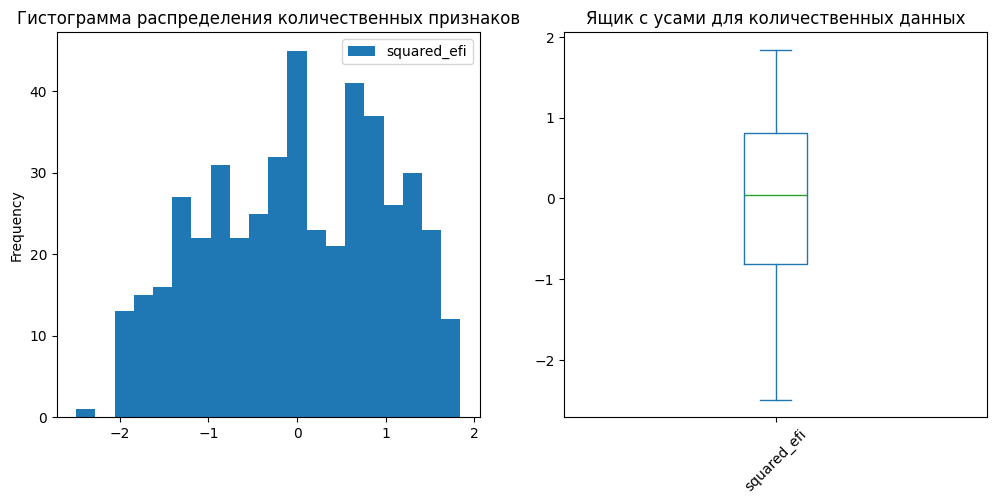

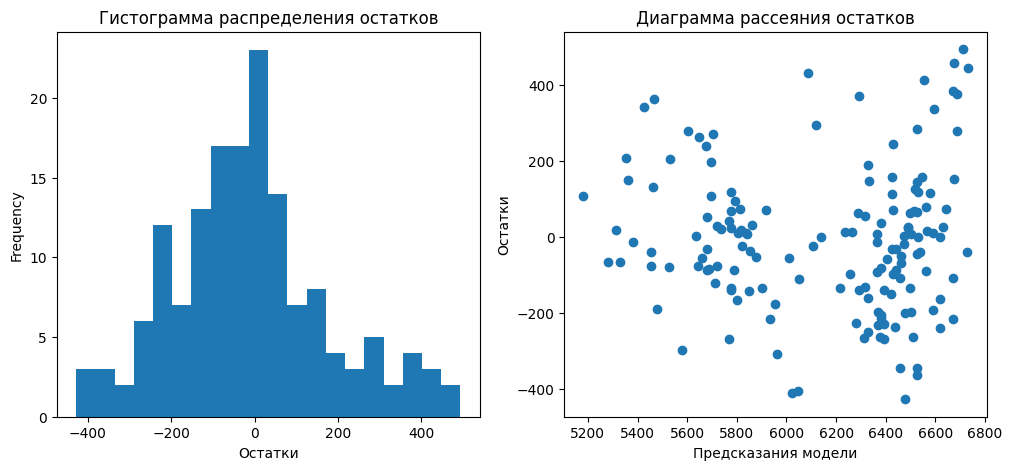

In [394]:
# Применение функции по обучению модели, а также запись новых признаков
num_col_names_2 = ['squared_efi']
cat_col_names_2 = cat_col_names + ['spr_binary']
target = 'milk_yield'
# Список значений, которые описывают гистограммы, а также любые числа, которые могут изменяться для разных моделей
# Сделано с целью повысить функциональность и гибкость функции
#значение_1 - параметр bins для гистограммы по масштабированию данных
#значение_2 - параметр bins для гистограммы по анализу остатков
diagramm_parametres = [20, 20]
# Присваивание функции используется, чтобы рассчиать на следующих этапах необходимые метрики модели
predictions_and_y_test_2 = fit_model_lr_and_get_analysis(ferma_main_df,
                                                         num_col_names_2,
                                                         cat_col_names_2,
                                                         target,
                                                         diagramm_parametres)

### Выводы:
- $R^2 = 0.823$
- Модель стала работать устойчивее, гистограмма распределения приобрела вид нормального распределения со средним значением в нуле
- Диаграмма рассеяния утратила явный вид рупора, и на ней просматривается постоянство дисперсии.

### 5.3 Обучение третьей модели линейной регрессии

- Обьединим датасеты `ferma_dad_df` и `ferma_main_df`,

In [395]:
print(ferma_main_df['id'].count())

617


In [396]:
ferma_dad_df['id'].count()

np.int64(629)

In [397]:
ferma_main_dad_df = ferma_main_df.merge(ferma_dad_df, on = 'id', how = 'left')
ferma_main_dad_df['id'].count()

np.int64(617)

- Объединение датасетов прошло успешно

- Обучим третью модель при помощи написанной выше функции
- Добавим к уже существующим категориальным признакам признак `dad_name`

In [398]:
# Изменение входных признаков
num_col_names_3 = num_col_names_2
cat_col_names_3 = cat_col_names_2 + ['dad_name']

Коэффициент детерминации для модели равен 0.84


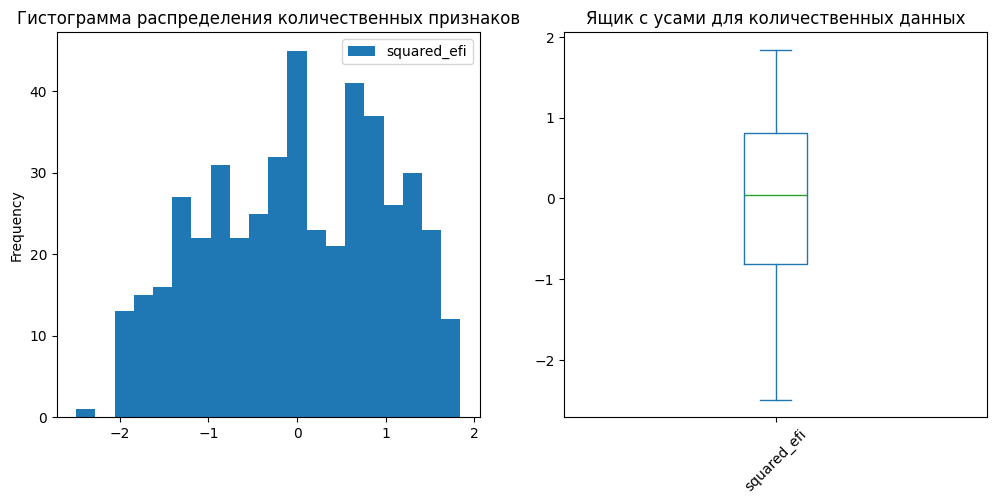

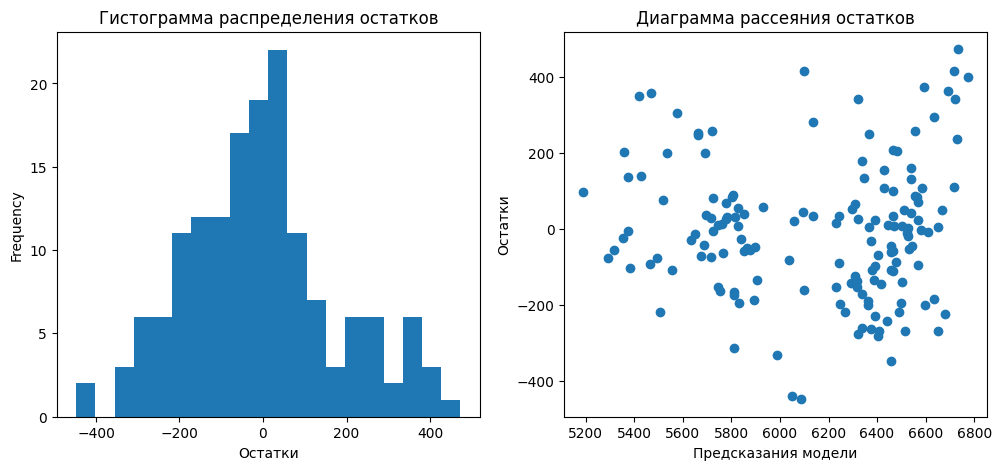

In [399]:
# Вызовем функцию
predictions_and_y_test_3 = fit_model_lr_and_get_analysis(ferma_main_dad_df,
                                                         num_col_names_3,
                                                         cat_col_names_3,
                                                         target, diagramm_parametres)

- $R^2 = 0.84$
- Гистограмма распределения остатков приняла вид нормального распределения со средним значением в 0
- Диаграмма рассеяния остатков также свидетельствует о постоянстве дисперсии

### 5.4 Сопоставление качества обученных моделей

- Каждая последующая модель становилась точнее и устойчивее:
    + Значение $R^2$ повышалось:
        * первая модель (0.807)
        * вторая модель (0.824)
        * третья модель (0.84) - следовательно точность предсказаний моделей возрастает
    + Вид гистограмм распределения остатков также изменялся в лучшую сторону:
        * в первой модели гистограмма с выбросами, также на ней наблюдалась мультимодальность и смещение влево(предсказанные значения завышались)
        * во второй модели гистограмма приняла вид нормального распределения со средним значением в 0, но тем не менее с правой её стороны присутствует небольшой "горб"
        * у третьей модели гистограмма наиболее сбалансирована по сравнению с остальными, её вид наиболее близок к нормальному распределению со средним значением в нуле, а также отсутствуют какие - либо недостатки, указанные в предыдущих моделях
    + Диграмма рассеяния остатков по мере изменения модели получала положительные изменения:
        * У первой модели видна неравномерность дисперсии и высокий разброс в некоторых областях значений
        * Диаграмма рассеяния второй модели приняла более сжатый вид вдоль ординаты, а дисперсия стала претерпевать меньшие колебания
        * Диаграмма рассеяния третьей модели практически аналогична второй
        * Необходимо заметить тот факт, что для области от значений 5800 до 6000 дисперсия существенно уменьшается

### 5.5 Оценка качества работы моделей

- Напишем функцию для расчёт метрик $MAE$, $MSE$, $RMSE$

In [400]:
def get_metrics(y_test, predictions, text):
    print(f"Метрики {text} модели:")
    print(' ')
    print(f"Значение MSE: {mean_squared_error(y_test, predictions):.2f}")
    print(f"Значение RMSE: {root_mean_squared_error(y_test, predictions):.2f}")
    print(f"Значение MAE: {mean_absolute_error(y_test, predictions):.2f}")
    print(' ')

In [401]:
predictions_and_y_test_list = [
                                predictions_and_y_test_1,
                                predictions_and_y_test_2,
                                predictions_and_y_test_3
                              ]
text = ['первой', 'второй', 'третьей']
for i in range (0, 3):
    get_metrics(predictions_and_y_test_list[i][1], predictions_and_y_test_list[i][0], text[i])

Метрики первой модели:
 
Значение MSE: 38324.43
Значение RMSE: 195.77
Значение MAE: 154.49
 
Метрики второй модели:
 
Значение MSE: 35429.97
Значение RMSE: 188.23
Значение MAE: 145.04
 
Метрики третьей модели:
 
Значение MSE: 32029.92
Значение RMSE: 178.97
Значение MAE: 138.60
 


- Третья модель является лучшей по всем показателям, поэтому для предсказания удоя молока для коров из датасета `cow_buy_df` используем именно её
- Рассчитаем доверительный интервал для вероятности в 95% для значений `residuals` третьей модели линейной регрессии

<div class="alert alert-info"> <b>Комментарии студента:</b>
В указаниях к проекту написано, что следует рассчитать доверительный интервал для тренировочных данных(y_train), я не совсем понял для чего это нужно, ведь это значение никак не отражает работу модели. Поэтому рассчитал значение доверительного интервала для значений, которые модель предсказала при тестировании </div>

In [402]:
interval = st.norm.interval(confidence = 0.95,
                      loc = np.mean(predictions_and_y_test_3[1]),
                      scale = st.sem(predictions_and_y_test_3[1]))

In [403]:
interval = (interval[0].round(1), interval[1].round(1))
print(interval)

(np.float64(6084.2), np.float64(6213.6))


- Таким образом, с вероятностью 95% предсказанные значения будут колебаться в промежутке от 6084 до 6213 литров, что является достаточно узким интервалом и делает предсказания достаточно точными

### 5.6 Прогноз удоя коров из датасета `cow_buy_df`

- Как было сказано ранее, воспользуемся третьей моделью для прогноза значений коров, рассматриваемых к покупке
- Добавим нужные столбцы(`energetic_feed_unit`, `sugar_protein_ratio`, `crude_protein`), присвоив средние значения из датасета `ferma_main_dad_df`, увеличенные на 5%, и проведём подготовку данных

In [404]:
cow_buy_df['energetic_feed_unit'] = (ferma_main_dad_df['energetic_feed_unit'].mean() * 1.05).round(2)
cow_buy_df['sugar_protein_ratio'] = (ferma_main_dad_df['sugar_protein_ratio'].mean() * 1.05).round(2)
cow_buy_df['crude_protein'] = (ferma_main_dad_df['crude_protein'].mean() * 1.05).round(2)

- Добавим признаки, которые присутствуют в третьей модели

In [405]:
# Переименуем названия столбцов current_fat_content и current_crude_protein
cow_buy_df = cow_buy_df.rename(columns = {
                                                'current_fat_content' : 'fat_content',
                                                'current_level_protein' : 'protein'
                                               })
cow_buy_df.columns

Index(['breed', 'type_of_grazing', 'bull_dad_breed', 'dad_name', 'fat_content',
       'protein', 'age', 'energetic_feed_unit', 'sugar_protein_ratio',
       'crude_protein'],
      dtype='object')

In [406]:
cow_buy_df['spr_binary'] = cow_buy_df['sugar_protein_ratio'].apply(lambda x: 1 if x >= 0.92 else 0)
cow_buy_df['squared_efi'] = cow_buy_df['energetic_feed_unit'].apply(lambda x: pow(x, 2)).round(2)
num_col_names_3p = ['squared_efi']
cat_col_names_3p = cat_col_names_3

In [407]:
# Импортируем из модели для третьей линейной регрессии необходимый масштаб и кодировку
scaler_3 = predictions_and_y_test_3[2]
encoder_3 = predictions_and_y_test_3[3]
encoder_col_names_3 = predictions_and_y_test_3[4]
model_lr_3 = predictions_and_y_test_3[5]

X_predict_3 = cow_buy_df[num_col_names_3p + cat_col_names_3p]

# Масштабирование количественных признаков
X_predict_scaled_3 = scaler_3.transform(X_predict_3[num_col_names_3p])
X_predict_scaled_3 = pd.DataFrame(X_predict_scaled_3, columns = num_col_names_3p)

# Масштабирование категориальных признаков
X_predict_ohe_3 = encoder_3.transform(X_predict_3[cat_col_names_3p])
X_predict_ohe_3 = pd.DataFrame(X_predict_ohe_3, columns = encoder_col_names_3)

# Получение датафрейма отмасштабированных и закодированных входных признаков
X_predict_3 = pd.concat([X_predict_scaled_3, X_predict_ohe_3], axis = 1)

# Формирование прогнозов
cow_buy_df['milk_yield'] = model_lr_3.predict(X_predict_3).round(2)

cow_buy_df

breed type_of_grazing bull_dad_breed  dad_name  fat_content  \
0    Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.58   
1    Вис Бик Айдиал       равнинное        Соверин    Буйный         3.54   
2   РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
3   РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
4   РефлешнСоверинг       равнинное         Айдиал    Буйный         3.64   
5   РефлешнСоверинг       равнинное        Соверин  Геркулес         3.63   
6    Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.58   
7    Вис Бик Айдиал       равнинное        Соверин    Буйный         3.57   
8   РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
9   РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
10   Вис Бик Айдиал       холмистое        Соверин  Соловчик         3.73   
11  РефлешнСоверинг       равнинное        Соверин  Геркулес         3.73   
12   Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.68   
13   Вис Бик Айдиал       холмистое        Соверин     Барин         3.42   
14  РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
15  РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
16   Вис Бик Айдиал       холмистое        Соверин  Соловчик         3.73   
17  РефлешнСоверинг       равнинное        Соверин  Геркулес         3.77   
18   Вис Бик Айдиал       равнинное        Соверин    Буйный         3.34   
19  РефлешнСоверинг       равнинное         Айдиал    Буйный         3.64   

    protein          age  energetic_feed_unit  sugar_protein_ratio  \
0     3.076  более_2_лет                15.29                 0.96   
1     3.081  менее_2_лет                15.29                 0.96   
2     3.074  более_2_лет                15.29                 0.96   
3     3.061  более_2_лет                15.29                 0.96   
4     3.074  более_2_лет                15.29                 0.96   
5     3.053  менее_2_лет                15.29                 0.96   
6     3.076  более_2_лет                15.29                 0.96   
7     3.079  более_2_лет                15.29                 0.96   
8     3.074  более_2_лет                15.29                 0.96   
9     3.079  менее_2_лет                15.29                 0.96   
10    3.055  более_2_лет                15.29                 0.96   
11    3.073  более_2_лет                15.29                 0.96   
12    3.046  более_2_лет                15.29                 0.96   
13    3.075  менее_2_лет                15.29                 0.96   
14    3.074  более_2_лет                15.29                 0.96   
15    3.065  более_2_лет                15.29                 0.96   
16    3.079  более_2_лет                15.29                 0.96   
17    3.053  менее_2_лет                15.29                 0.96   
18    3.069  более_2_лет                15.29                 0.96   
19    3.074  более_2_лет                15.29                 0.96   

    crude_protein  spr_binary  squared_efi  milk_yield  
0         2021.11           1       233.78     6568.68  
1         2021.11           1       233.78     6298.11  
2         2021.11           1       233.78     6292.98  
3         2021.11           1       233.78     6579.96  
4         2021.11           1       233.78     6540.28  
5         2021.11           1       233.78     6336.68  
6         2021.11           1       233.78     6568.68  
7         2021.11           1       233.78     6535.96  
8         2021.11           1       233.78     6292.98  
9         2021.11           1       233.78     6342.11  
10        2021.11           1       233.78     6347.74  
11        2021.11           1       233.78     6574.52  
12        2021.11           1       233.78     6568.68  
13        2021.11           1       233.78     6069.89  
14        2021.11           1       233.78     6292.98  
15        202

- Анализируя прогнозы по удою молока для продаваемых коров, можно заметить, что у всех коров этот показатель превышает 6000 кг
- Тем не менее следует учесть разброс в прогнозе в виде доверительного интервала от 6084 до 6213 кг, а также тот факт, что показатели были усреднены для всех коров.

# Шаг 6. Задача классификации

### 6.1 Подготовка данных и обучение модели

- Для модели логистической регрессии воспользуемся признаком `fat_content`
- Построим дополнительно диаграммы рассеяния с новыми столбцами, чтобы выявить существенно влияющие на целевой признак показатели

In [408]:
def build_pie_diagramms(df, category_attribute, target):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

    df_column = df.pivot_table(index = category_attribute, values = 'id', aggfunc = ['count'])
    df_column.columns = ['quantity']
    df_column['quantity'] = df_column['quantity'] / df['spr_binary'].count()
    axes[0].set_title(f'Распределение - {category_attribute}');
    axes[0].pie(df_column['quantity'], autopct='%1.2f%%');
    axes[0].legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left', labels = df_column.index);

    df_column = df.loc[df['gustation_of_milk']=='вкусно'].pivot_table(
                                                                        index = category_attribute,
                                                                        values = 'id',
                                                                        aggfunc = ['count']
                                                                 )
    df_column.columns = ['quantity']
    df_column['quantity'] = df_column['quantity'] / df[category_attribute].count()
    axes[1].set_title(f'Вкусное молоко - {category_attribute}');
    axes[1].pie(df_column['quantity'], autopct='%1.2f%%');
    axes[1].legend(bbox_to_anchor = (1.0, 1.0), loc = 'upper left', labels = df_column.index);

In [409]:
# Для справки и анализа графиков вывел количество коров, у которых молоко вкусное и нет
ferma_main_dad_df.pivot_table(index = 'gustation_of_milk', values ='id', aggfunc = ['count'])

count
                     id
gustation_of_milk      
вкусно              363
не вкусно           254

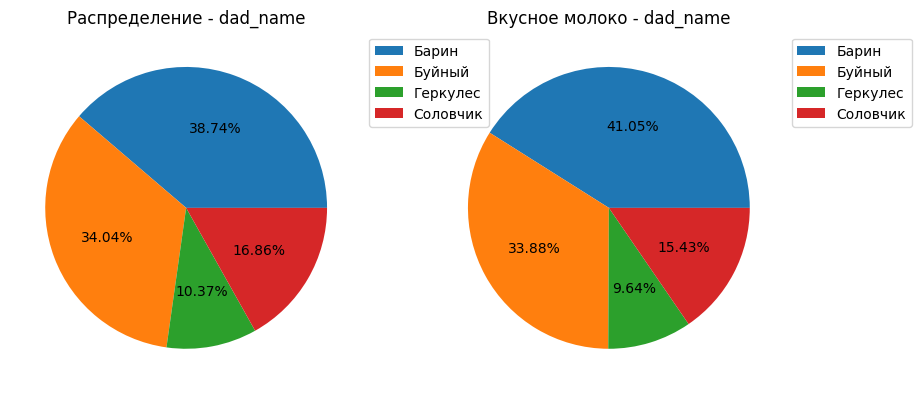

In [410]:
build_pie_diagramms(ferma_main_dad_df, 'dad_name', 'gustation_of_milk')

- По диаграммам видно, что для коров, у которых имя папы - быка `Барин`, дают в процентном соотношении больше вкусного молока, чем остальные коровы
- Воспользуемся этим признаком при обучении модели логистической регрессии

- Построим круговые диаграммы для выявления влияния признака `spr_binary` на целевой

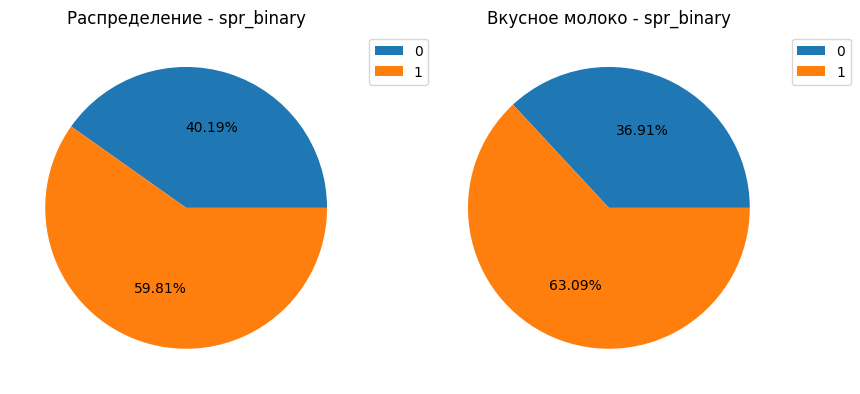

In [411]:
build_pie_diagramms(ferma_main_dad_df, 'spr_binary', 'gustation_of_milk')

- Коровы, у которых показатель СПО - бинарный равен 1, с учётом процентного соотношения молоко вкуснее
- Также учтём этот признак

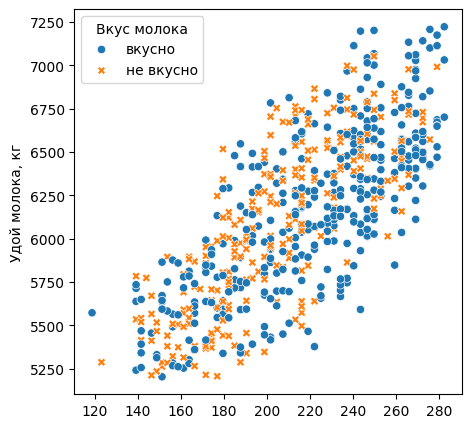

In [412]:
scatterplot_build(ferma_main_dad_df, 'squared_efi', 'milk_yield', 'gustation_of_milk', dict_of_change)

- Между вкусом молока и признаком ЭКЕ, возведённом в квадрат нет связи

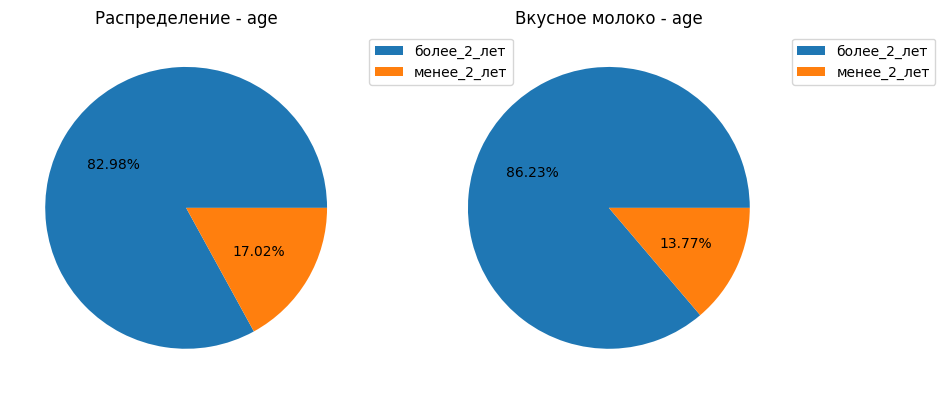

In [413]:
build_pie_diagramms(ferma_main_dad_df, 'age', 'gustation_of_milk')

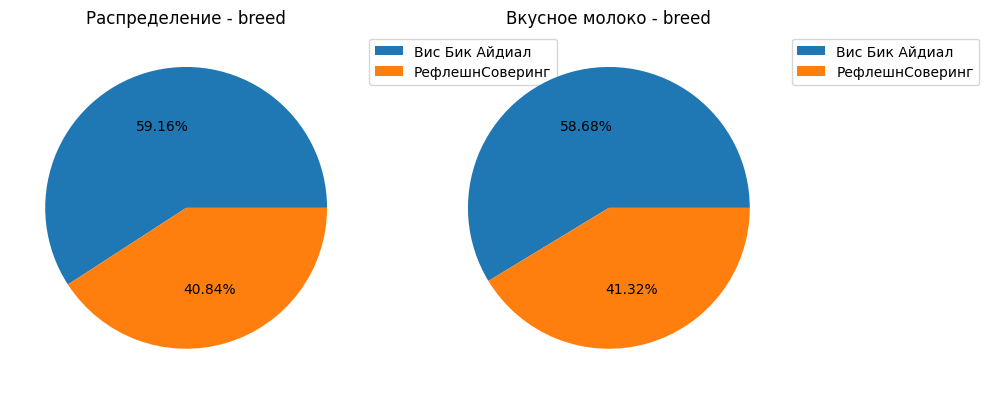

In [414]:
build_pie_diagramms(ferma_main_dad_df, 'breed', 'gustation_of_milk')

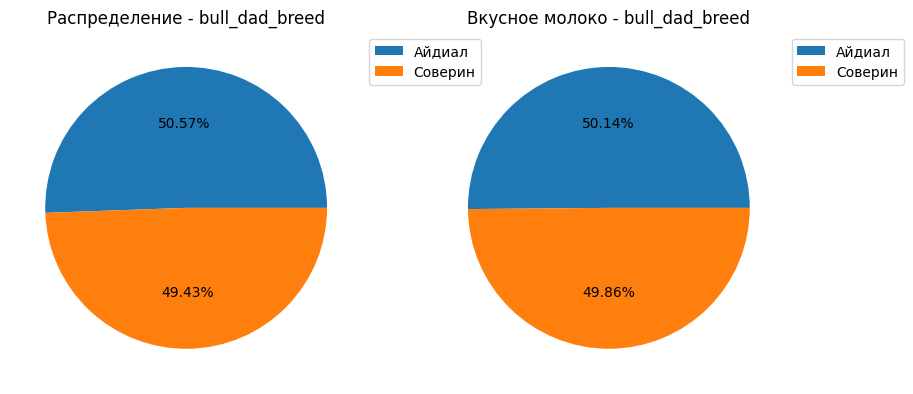

In [415]:
build_pie_diagramms(ferma_main_dad_df, 'bull_dad_breed', 'gustation_of_milk')

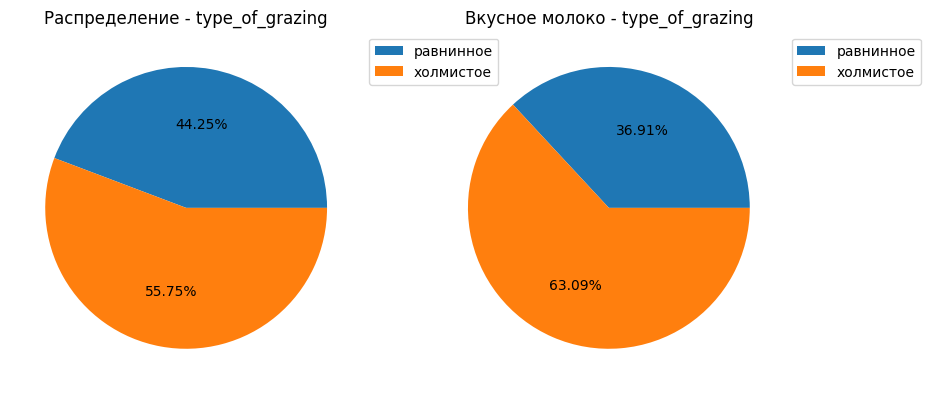

In [416]:
build_pie_diagramms(ferma_main_dad_df, 'type_of_grazing', 'gustation_of_milk')

- Для того чтобы была полная картина корреляции между признаками в датасете, воспользуемся библиотекой `phik`

interval columns not set, guessing: ['id', 'milk_yield', 'energetic_feed_unit', 'crude_protein', 'sugar_protein_ratio', 'fat_content', 'protein', 'spr_binary', 'squared_efi']


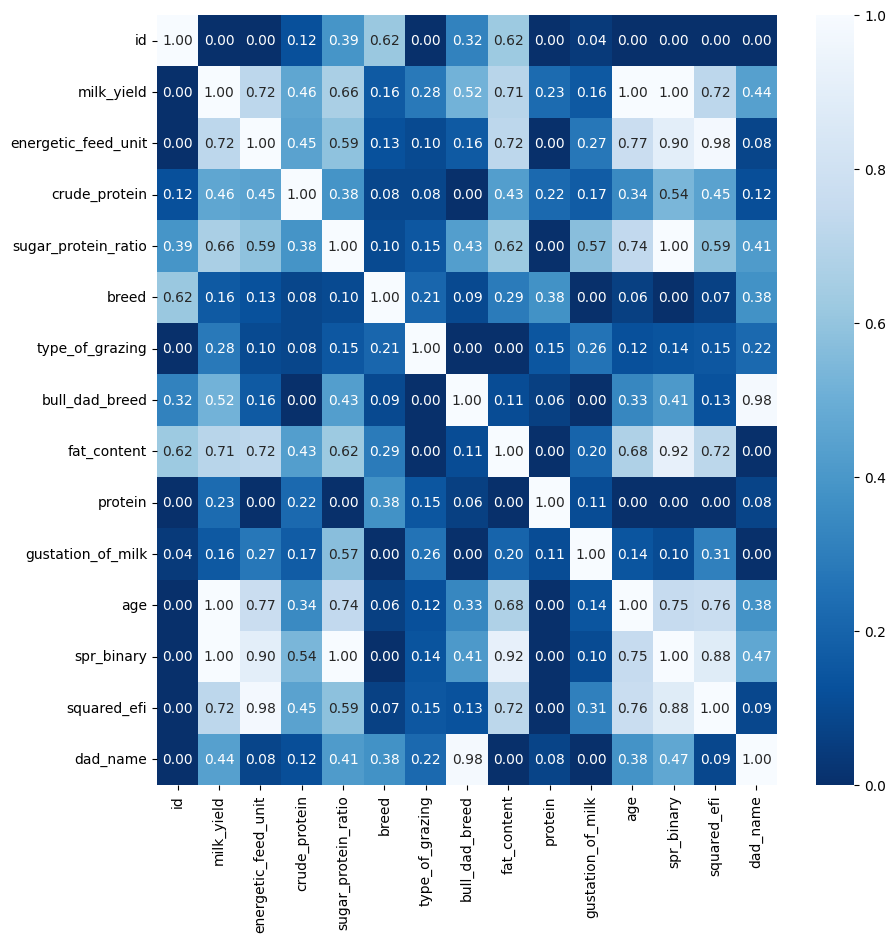

In [417]:
phi_matrix = ferma_main_dad_df.phik_matrix();
fig, ax = plt.subplots(figsize = (10, 10));
sns.heatmap(phi_matrix, annot=True, fmt = '.2f', cmap='Blues_r');

- В итоге для обучения модели используем:
    + количественные признаки : `squared_efi`, `protein`, `crude_protein`, `fat_content`
    + категориальные признаки : `dad_name`, `type_of_grazing`, `age`, `breed`, `bull_dad_breed`, `spr_binary`

- Проведём категоризацию признака `fat_content` и назовём его `fat_content_group`

In [418]:
# Функиця по присвоению категорий количественному признаку
#def category_assign(value):
#        if value >= 3.1 and value < 3.5:
#            return(1)
#        elif value >= 3.5 and value < 3.67:
#            return(2)
#        elif value >= 3.67 and value < 3.9:
#            return(3)

In [419]:
#ferma_main_dad_df['fat_content_group'] = ferma_main_dad_df['fat_content'].apply(lambda x : category_assign(x))

In [420]:
#ferma_main_dad_df['fat_content_group'].unique()

In [421]:
ferma_main_dad_df.head()

id  milk_yield  energetic_feed_unit  crude_protein  sugar_protein_ratio  \
0   1        5863                 14.2           1743                0.890   
1   2        5529                 12.8           2138                0.890   
2   3        5810                 14.0           1854                0.885   
3   4        5895                 12.4           2012                0.885   
4   5        5302                 12.8           1675                0.885   

             breed type_of_grazing bull_dad_breed  fat_content  protein  \
0   Вис Бик Айдиал       равнинное         Айдиал         3.58    3.076   
1   Вис Бик Айдиал       равнинное        Соверин         3.54    3.079   
2  РефлешнСоверинг       холмистое        Соверин         3.59    3.074   
3  РефлешнСоверинг       холмистое         Айдиал         3.40    3.075   
4   Вис Бик Айдиал       равнинное        Соверин         3.73    3.073   

  gustation_of_milk          age  spr_binary  squared_efi  dad_name  
0            вкусно  более_2_лет           0       201.64    Буйный  
1            вкусно  менее_2_лет           0       163.84  Соловчик  
2         не вкусно  более_2_лет           0       196.00     Барин  
3         не вкусно  более_2_лет           0       153.76    Буйный  
4            вкусно  менее_2_лет           0       163.84     Барин

In [422]:
num_col_names_lg = ['squared_efi', 'protein', 'crude_protein', 'fat_content']
cat_col_names_lg = ['dad_name', 'type_of_grazing', 'age', 'breed', 'bull_dad_breed', 'spr_binary']
X_lg = ferma_main_dad_df[num_col_names_lg + cat_col_names_lg]
y_lg = ferma_main_dad_df['gustation_of_milk']

X_train, X_test, y_train, y_test = train_test_split(X_lg, y_lg, random_state = RANDOM_STATE)

scaler_lg = StandardScaler()
X_train_scaled_lg = scaler_lg.fit_transform(X_train[num_col_names_lg])
X_test_scaled_lg = scaler_lg.transform(X_test[num_col_names_lg])

X_train_scaled_lg = pd.DataFrame(X_train_scaled_lg, columns = num_col_names_lg)
X_test_scaled_lg = pd.DataFrame(X_test_scaled_lg, columns = num_col_names_lg)

encoder_lg = OneHotEncoder(drop = 'first', sparse_output = False)
X_train_ohe_lg = encoder_lg.fit_transform(X_train[cat_col_names_lg])
X_test_ohe_lg = encoder_lg.transform(X_test[cat_col_names_lg])

encoder_col_names = encoder_lg.get_feature_names_out()

X_train_ohe_lg = pd.DataFrame(X_train_ohe_lg, columns = encoder_col_names)
X_test_ohe_lg = pd.DataFrame(X_test_ohe_lg, columns = encoder_col_names)


X_train_lg = pd.concat([X_train_scaled_lg, X_train_ohe_lg], axis = 1)
X_test_lg = pd.concat([X_test_scaled_lg, X_test_ohe_lg], axis = 1)



In [423]:
# Обучение модели
clf = LogisticRegression()
clf = clf.fit(X_train_lg, y_train)
y_pred = clf.predict(X_test_lg)


In [424]:
cm = confusion_matrix(y_test, y_pred)
# Расчёт метрики accuracy
acc = accuracy_score(y_test, y_pred)
precision = (cm[0, 1] / (cm[1,1] + cm[0, 1])).round(3)
recall = (cm[1, 0] / (cm[1,1] + cm[1, 0])).round(3)
print(f"Для модели значение accuracy составляет : {round(acc, 3)}")
print(f"Для модели значение precision составляет : {round(precision, 3)}")
print(f"Для модели значение recall составляет : {round(recall, 3)}")
#print((clf.coef_).round(3))

Для модели значение accuracy составляет : 0.697
Для модели значение precision составляет : 0.349
Для модели значение recall составляет : 0.533


-  $accuracy = 0.697$
-  $precision = 0.349$
-  $recall = 0.533$

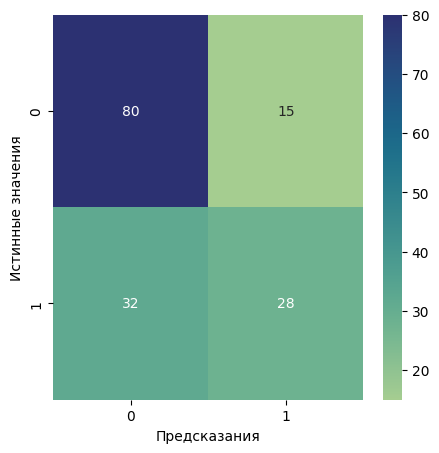

In [425]:
fig, ax = plt.subplots(figsize = (5,5));
sns.heatmap(cm, annot = True, cmap = 'crest');
ax.set_xlabel('Предсказания');
ax.set_ylabel('Истинные значения');

- По всем показателям качество модели плохое, необходимо скорректировать её работу в следующем этапе данного шага

### 6.2 Анализ работы модели логистической регрессии

- Фермеру важнее выбрать коров со вкусным молоком, поэтому модель необходимо настроить таким образом, чтобы значение метрики `precision` было как можно выше. Иными словами значение ошибок 1 - го рода необходимо свести к нулю
- Чтобы добиться этой цели, необходимо изменить порог принадлежности к классам

In [426]:
# Выберем несколько порогов для принадлежности к классам
threshold = [round(i,2) for i in np.linspace(0.7, 0.81, num = 8, endpoint = True)]

In [427]:
threshold

[np.float64(0.7),
 np.float64(0.72),
 np.float64(0.73),
 np.float64(0.75),
 np.float64(0.76),
 np.float64(0.78),
 np.float64(0.79),
 np.float64(0.81)]

In [428]:
# Значения, которые присваивает модель при тестировании
y_proba = clf.predict_proba(X_test_lg)[:, 0]

In [429]:
data_result = pd.DataFrame(zip(y_test, y_proba), columns = ['test', 'proba']).sort_values(by = 'proba', ascending = False)
data_result.head()

test     proba
38   вкусно  0.878557
36   вкусно  0.871631
21   вкусно  0.838699
107  вкусно  0.837862
112  вкусно  0.827963

In [430]:
columns = []
for i in threshold:
    columns.append('y_pred_' + str(i))
    data_result['y_pred_' + str(i)] = data_result['proba'].apply(lambda x : 1 if x >= i else 0 )
data_result.sample(5)

test     proba  y_pred_0.7  y_pred_0.72  y_pred_0.73  y_pred_0.75  \
69   не вкусно  0.457634           0            0            0            0   
57   не вкусно  0.641081           0            0            0            0   
58      вкусно  0.583467           0            0            0            0   
102  не вкусно  0.441938           0            0            0            0   
18   не вкусно  0.602388           0            0            0            0   

     y_pred_0.76  y_pred_0.78  y_pred_0.79  y_pred_0.81  
69             0            0            0            0  
57             0            0            0            0  
58             0            0            0            0  
102            0            0            0            0  
18             0            0            0            0

In [431]:
# Посчитаем метрики для указанных пороговых значений
def row_metrics(df, y_test, y_pred, threshold):
    df.loc[len(df.index)] = (
                              threshold,
                              round(accuracy_score(y_test, y_pred), 3),
                              round(precision_score(y_test, y_pred), 3),
                              round(recall_score(y_test, y_pred), 3)
                            )

    return(df_metrics)


In [432]:
df_metrics = pd.DataFrame(columns = ['threshold', 'accuracy', 'precision', 'recall'])
change_name = {'вкусно' : 1, 'не вкусно' : 0 }
data_result['test'] = data_result['test'].map(change_name)


In [433]:
for i in threshold:
    row_metrics(df_metrics, data_result['test'], data_result['y_pred_' + str(i)], i)
df_metrics

threshold  accuracy  precision  recall
0       0.70     0.542      0.786   0.347
1       0.72     0.523      0.818   0.284
2       0.73     0.523      0.839   0.274
3       0.75     0.484      0.826   0.200
4       0.76     0.477      0.818   0.189
5       0.78     0.477      0.850   0.179
6       0.79     0.465      1.000   0.126
7       0.81     0.458      1.000   0.116

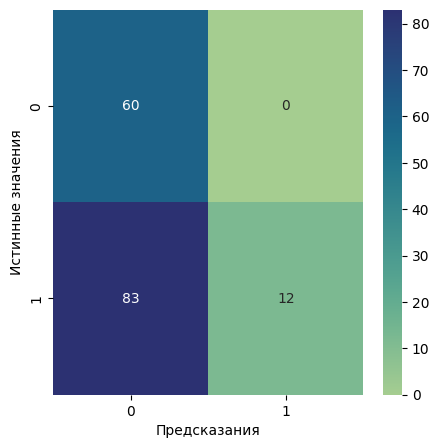

In [434]:
cm1 = confusion_matrix(data_result['test'], data_result['y_pred_0.79'])
fig, ax = plt.subplots(figsize = (5,5));
sns.heatmap(cm1, annot = True, cmap = 'crest');
ax.set_xlabel('Предсказания');
ax.set_ylabel('Истинные значения');

- Ошибка FP сведена к нулю
- Модель очень часто стала ошибаться (метрика accuracy упала до 0.465)
- Число ошибок FN почти выросло с 30 до 83
- Снизилось число TP
- Приступим к получению прогнозов по коровам, которые рассматриваются к покупке

### 6.3 Прогноз вкуса молока коров

- Подготовка данных и получение прогнозов

In [435]:
#cow_buy_df['fat_content_group'] = cow_buy_df['fat_content'].apply(lambda x : category_assign(x))

In [436]:
X_lg = cow_buy_df[num_col_names_lg + cat_col_names_lg]

# Масштабирование количественных данных
X_pred_scaled_lg = scaler_lg.transform(X_lg[num_col_names_lg])
X_pred_scaled_lg = pd.DataFrame(X_pred_scaled_lg, columns = num_col_names_lg)

# Масштабирование категориальных данных
X_pred_ohe_lg = encoder_lg.transform(X_lg[cat_col_names_lg])
X_pred_ohe_lg = pd.DataFrame(X_pred_ohe_lg, columns = encoder_col_names)

# Объединение закодированных данных
X_pred_lg = pd.concat([X_pred_scaled_lg, X_pred_ohe_lg], axis = 1)

# Получение прогнозов
cow_buy_df['prediction'] = clf.predict_proba(X_pred_lg)[:, 0]
cow_buy_df['gustation_of_milk'] = cow_buy_df['prediction'].apply(lambda x : 'вкусно' if x >= 0.79 else 'не вкусно')

# Дополнительные прогнозы с разными пороговыми значениями
for i in range(0, 10):
    columns.append('gustation_of_milk_' + str(round((0.6 + 0.02 * i), 2)))

    cow_buy_df['gustation_of_milk_' + str(round((0.6 + 0.02 * i), 2))] = \
    cow_buy_df['prediction'].apply(lambda x : 'вкусно' if (x >= round((0.6 + 0.02 * i), 2)) else 'не вкусно')

cow_buy_df

breed type_of_grazing bull_dad_breed  dad_name  fat_content  \
0    Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.58   
1    Вис Бик Айдиал       равнинное        Соверин    Буйный         3.54   
2   РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
3   РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
4   РефлешнСоверинг       равнинное         Айдиал    Буйный         3.64   
5   РефлешнСоверинг       равнинное        Соверин  Геркулес         3.63   
6    Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.58   
7    Вис Бик Айдиал       равнинное        Соверин    Буйный         3.57   
8   РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
9   РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
10   Вис Бик Айдиал       холмистое        Соверин  Соловчик         3.73   
11  РефлешнСоверинг       равнинное        Соверин  Геркулес         3.73   
12   Вис Бик Айдиал       холмистое         Айдиал  Геркулес         3.68   
13   Вис Бик Айдиал       холмистое        Соверин     Барин         3.42   
14  РефлешнСоверинг       равнинное        Соверин     Барин         3.59   
15  РефлешнСоверинг       холмистое         Айдиал    Буйный         3.40   
16   Вис Бик Айдиал       холмистое        Соверин  Соловчик         3.73   
17  РефлешнСоверинг       равнинное        Соверин  Геркулес         3.77   
18   Вис Бик Айдиал       равнинное        Соверин    Буйный         3.34   
19  РефлешнСоверинг       равнинное         Айдиал    Буйный         3.64   

    protein          age  energetic_feed_unit  sugar_protein_ratio  \
0     3.076  более_2_лет                15.29                 0.96   
1     3.081  менее_2_лет                15.29                 0.96   
2     3.074  более_2_лет                15.29                 0.96   
3     3.061  более_2_лет                15.29                 0.96   
4     3.074  более_2_лет                15.29                 0.96   
5     3.053  менее_2_лет                15.29                 0.96   
6     3.076  более_2_лет                15.29                 0.96   
7     3.079  более_2_лет                15.29                 0.96   
8     3.074  более_2_лет                15.29                 0.96   
9     3.079  менее_2_лет                15.29                 0.96   
10    3.055  более_2_лет                15.29                 0.96   
11    3.073  более_2_лет                15.29                 0.96   
12    3.046  более_2_лет                15.29                 0.96   
13    3.075  менее_2_лет                15.29                 0.96   
14    3.074  более_2_лет                15.29                 0.96   
15    3.065  более_2_лет                15.29                 0.96   
16    3.079  более_2_лет                15.29                 0.96   
17    3.053  менее_2_лет                15.29                 0.96   
18    3.069  более_2_лет                15.29                 0.96   
19    3.074  более_2_лет                15.29                 0.96   

    crude_protein  ...  gustation_of_milk_0.6  gustation_of_milk_0.62  \
0         2021.11  ...                 вкусно                  вкусно   
1         2021.11  ...              не вкусно               не вкусно   
2         2021.11  ...              не вкусно               не вкусно   
3         2021.11  ...              не вкусно               не вкусно   
4         2021.11  ...              не вкусно               не вкусно   
5         2021.11  ...              не вкусно               не вкусно   
6         2021.11  ...                 вкусно                  вкусно   
7         2021.11  ...              не вкусно               не вкусно   
8         2021.11  ...              не вкусно               не вкусно   
9         2021.11  ...                 вкусно                  вкусно   
10        2021.11  ...              не вкусно               не вкусно   
11        2021.11  ...              не вкусно    

# Шаг 7. Выводы

- Отбор коров, которые с минимальным риском для фермера будут удовлетворять его условиям, а именно удой молока не менее 6000 кг в год, а молоко является вкусным

In [437]:
cow_buy_df.loc[(cow_buy_df['milk_yield'] >= 6000) & (cow_buy_df['gustation_of_milk'] == 'вкусно')]

Empty DataFrame
Columns: [breed, type_of_grazing, bull_dad_breed, dad_name, fat_content, protein, age, energetic_feed_unit, sugar_protein_ratio, crude_protein, spr_binary, squared_efi, milk_yield, prediction, gustation_of_milk, gustation_of_milk_0.6, gustation_of_milk_0.62, gustation_of_milk_0.64, gustation_of_milk_0.66, gustation_of_milk_0.68, gustation_of_milk_0.7, gustation_of_milk_0.72, gustation_of_milk_0.74, gustation_of_milk_0.76, gustation_of_milk_0.78]
Index: []

[0 rows x 25 columns]

- Пороговое значение, которое позволяет фермеру выбрать коров с миниальным риском, не находит ни одной коровы, соответствующей его условиям
- В связи с этим была выведено несколько столбцов с разными пороговыми значениями, чтобы фермер сам определелился с выбором

### Выводы по моделям машинного обучения

- Для того чтобы улучшить качество модели линейной регрессии по мере работы с ней перебирал набор входных признаков и подбирал их таким образом, чтобы метрики были как можно выше. Способы:
    + Возведение в квадрат значений входного признака, чтобы корреляция с целевым признаком возросла
    + Переклассифиция признака из количественного в категориальный ввиду явного деления его значений на группы, чтобы не нарушать линейность входных признаков
    + Устранение мультколлинеарности посредством использования одного из двух сильно коррелирующих признаков, чтобы обеспечить устойчивость работы модели(в проекте не применялось)

- Достижение ещё более совершенных показателей модели возможно только засчёт получения дополнительных признаков сильно коррелирующих с целевым.
- Если рассматривать расклад, в котором добавление таких признаков невозможно, то вряд ли можно добиться кардинального улучшения работы модели, так как при стремлении повысить корреляцию входных признаков с целевым "синтетическими" методами, можно получить ложно хорошие результаты, которые на практике приведут к ошибке

- При работе с моделью логистической регрессии необходимо обратить внимание на такие метрики, как `precision` и `recall`. Важно понимать, что на практике упор делается только на одну из метрик, чтобы добиться целей, которые ставит бизнес:
    + Если требуется минимизировать риск, то необходимо свести к нулю ошибку FP(`precision` = 1), таким образом, предсказания модели будут точными
    + Если задача состоит в том, чтобы набрать нужное число клиентов, заинтересованных в какой - то акции, то ошибки FN уменьшаются до тех пор(`recall` повышается), пока нужно число не будет достигнуто
    + Также следует учитывать метрику `accuracy`, так как она в целом отражает правильность работы модели. В противном случае изменения пороговых значений в модели логистической регрессии, чтобы добиться хороших показателей  `precision` или `recall` (в зависимости от задачи бизнеса) при плохом `accuracy` не приведут к хорошему результату